# DX 602 Final Project

## Introduction

In this project, I utilized the skills that I learned in MOD 2 with a heavy focus on building models.

This project was meant to ensure that I understood how to implement these concepts in a real-world scenario.

## Allowed Imports

For this project, I was forbidden to use modules that were not loaded in this template to ensure a proper assessment of my knowledge and skills.

The modules that were allowed for this project were the following:

In [ ]:
import math
import sys

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Analyzing the Body Fat Dataset

### Step 1: Choosing the Dataset

For this project, I chose one of the following data sets to analyze, then loaded the dataset and showed a random sample of 10 rows.

* [Titanic disaster](https://www.kaggle.com/c/titanic/data) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/titanic))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

<h4>Body Fat dataset</h4>
<p>As I was interested in the idea of viewing the correlations between various body measurement features and body fat percentage, I chose to analyze the Body Fat dataset for this project.</p>
<p>The code to load this dataset and show the first 10 rows of the first 10 columns can be found below:</p>

In [ ]:
# YOUR CODE HERE

# Load the Body Fat dataset
body_fat = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz", sep="\t").dropna()

# First 10 rows of the first 10 columns
body_fat.iloc[:10, :10]

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee
0,1.0708,23.0,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999
1,1.0853,22.0,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999
2,1.0414,22.0,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002
3,1.0751,26.0,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999
4,1.0340,24.0,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001
5,1.0502,24.0,210.25,74.75,39.000000,104.500000,94.400002,107.800003,66.000000,42.000000
6,1.0549,26.0,181.00,69.75,36.400002,105.099998,90.699997,100.300003,58.400002,38.299999
7,1.0704,25.0,176.00,72.50,37.799999,99.599998,88.500000,97.099998,60.000000,39.400002
8,1.0900,25.0,191.00,74.00,38.099998,100.900002,82.500000,99.900002,62.900002,38.299999
9,1.0722,23.0,198.25,73.50,42.099998,99.599998,88.599998,104.099998,63.099998,41.700001


### Step 2: Describing the Dataset

<h4>Body Fat dataset columns</h4>
<p>According to the <a href="https://github.com/EpistasisLab/pmlb/blob/master/datasets/560_bodyfat/metadata.yaml">metadata</a>, the Body Fat dataset "lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men."  This dataset and these measurements are associated with the paper titled "<a href="https://doi.org/10.1249/00005768-198504000-00037">Generalized body composition prediction equation for men using simple measurement techniques</a>" by K.W. Penrose, A. G. Nelson, and A. G. Fisher.</p>
<p>In my own words, I used this context to describe each column of the dataset using the following code and subsequent print statements:</p>

In [ ]:
# YOUR CODE HERE

# Assign the columns of the dataset to p2
p2 = body_fat.columns

# Use each column in p2 to create a new dictionary key and assign an empty string to each key
p2_descriptions = {c: "" for c in p2}


# Column descriptions
p2_descriptions["Density"] = "the individual's body fat density determined from underwater weighing (gm/cm^3)"
p2_descriptions["Age"] = "the individual's age in years"
p2_descriptions["Weight"] = "the individual's weight in pounds (lbs)"
p2_descriptions["Height"] = "the individual's height in inches (in)"
p2_descriptions["Neck"] = "the individual's neck circumference in centimeters (cm)"
p2_descriptions["Chest"] = "the individual's chest circumference in centimeters (cm)"
p2_descriptions["Abdomen"] = "the individual's abdomen 2 circumference in centimeters (cm), where their abdomen is measured laterally, at the level of the iliac crests, and anteriorly, at the umbilicus"
p2_descriptions["Hip"] = "the individual's hip circumference in centimeters (cm)"
p2_descriptions["Thigh"] = "the individual's thigh circumference in centimeters (cm)"
p2_descriptions["Knee"] = "the individual's knee circumference in centimeters (cm)"
p2_descriptions["Ankle"] = "the individual's ankle circumference in centimeters (cm)"
p2_descriptions["Biceps"] = "the individual's bicep (extended) circumference in centimeters (cm)"
p2_descriptions["Forearm"] = "the individual's forearm circumference in centimeters (cm)"
p2_descriptions["Wrist"] = "the individual's wrist circumference in centimeters (cm)"
p2_descriptions["target"] = "the individual's body fat percentage based on Siri's (1956) equation"

# Loop through each column given in p2 to output the column name and relevant description
for i, c in enumerate(p2):
    print(f'Column {i + 1} is "{c}", which represents {p2_descriptions[c]}.')

Column 1 is "Density", which represents the individual's body fat density determined from underwater weighing (gm/cm^3).
Column 2 is "Age", which represents the individual's age in years.
Column 3 is "Weight", which represents the individual's weight in pounds (lbs).
Column 4 is "Height", which represents the individual's height in inches (in).
Column 5 is "Neck", which represents the individual's neck circumference in centimeters (cm).
Column 6 is "Chest", which represents the individual's chest circumference in centimeters (cm).
Column 7 is "Abdomen", which represents the individual's abdomen 2 circumference in centimeters (cm), where their abdomen is measured laterally, at the level of the iliac crests, and anteriorly, at the umbilicus.
Column 8 is "Hip", which represents the individual's hip circumference in centimeters (cm).
Column 9 is "Thigh", which represents the individual's thigh circumference in centimeters (cm).
Column 10 is "Knee", which represents the individual's knee ci

<p>Additionally, all of these columns are continuous numeric variables, necessary for performing regression techniques across the entire dataset.</p>

### Step 3: Performing Exploratory Data Analysis

<h4>Exploratory Data Analysis (EDA) on the Body Fat dataset</h4>
<p>For my EDA of this dataset, I chose to generate several subplots to analyze the relationship between each feature with the target (body fat percentage) variable.</p>
<p>I also chose to generate the correlation coefficients to obtain the R-squared value (which is generated by coefficient^2), with the assumption of linear relationships between the features and body fat percentage for the sake of simplicity.</p>
<p>These subplots and correlation coefficients for EDA are found below:</p>

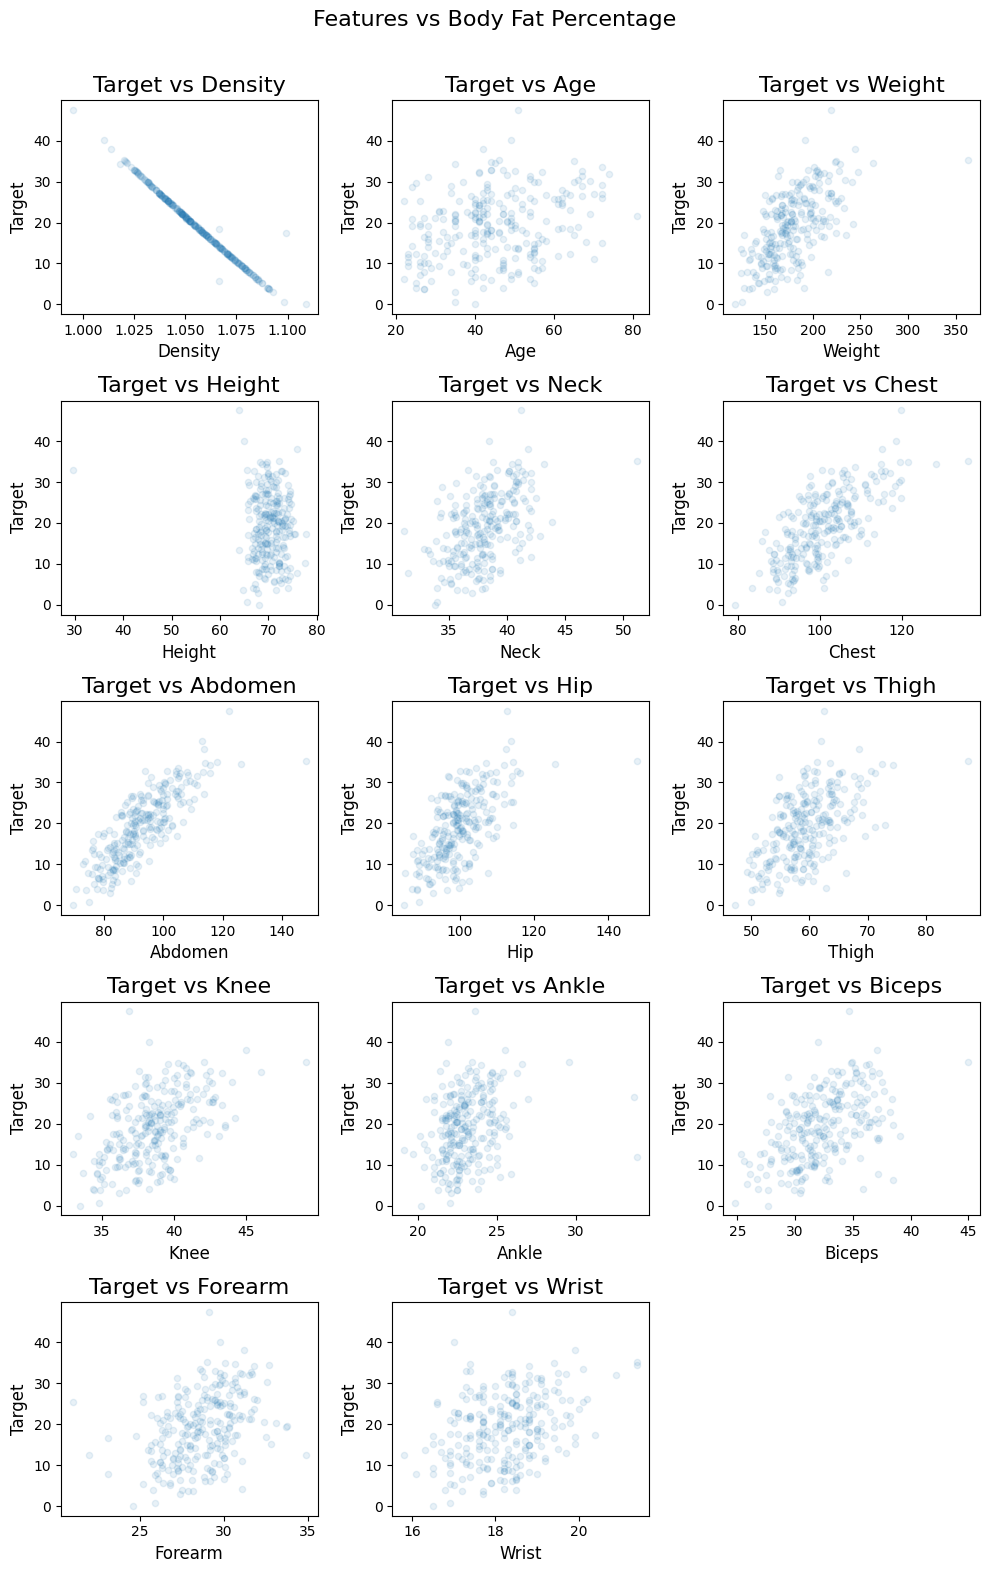

In [ ]:
# YOUR CODE HERE

# Empty dictionary to hold future correlation coefficients
feature_target_corr = {}

# The plot columns are only the features of the dataset as they will be measured against body fat percentage
plot_columns = [c for c in body_fat.columns if c != "target"]

# Frame the subplots into 3 subplot columns
num_cols = 3

# Ensure that the amount of rows is equivalent to the total number of columns
    # divided by the number of columns using integer division:
num_rows = (len(plot_columns) + num_cols - 1) // num_cols

# Generate the plots
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for (i, c) in enumerate(plot_columns):
    # Create the feature and target variables
    feature = body_fat[c]
    target = body_fat["target"]

    # Generate the correlation coefficient between the current feature and body fat percentage
    correlation = np.corrcoef(feature, target)[0, 1]  # Correlation coefficient
    # Generate the R-squared value using correlation^2
    r_squared = correlation ** 2
    # Append the R-squared value to the correlation dictionary
    feature_target_corr[c] = r_squared

    # Generate the plot, itself, to compare the current feature and the target variable
    plt.subplot(num_rows, num_cols, i + 1)
    body_fat.plot.scatter(c, "target", alpha=0.1, ax=plt.gca())
    plt.xlabel(c, fontsize=12)
    plt.ylabel("Target", fontsize=12)
    plt.title(f"Target vs {c}", fontsize=16)

# Provide the title for the entire visual
plt.suptitle("Features vs Body Fat Percentage", fontsize=16)

 # Adjust the spacing accordingly
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
plt.close()

<p>From this EDA, the features that stood out to me were the relationships between body fat percentage and density, height, and age, with different reasons for why each one was noteworthy to me.</p>

<h4>Feature vs Body Fat Percentage Correlation Coefficients</h4>

The following are outputs for the R-squared values between each feature and body fat percentage.

In [ ]:
for k, v in feature_target_corr.items():
    print(f"The column \"{k}\" has a correlation coefficient of {v}.")

The column "Density" has a correlation coefficient of 0.9757140717302929.
The column "Age" has a correlation coefficient of 0.08494801963847155.
The column "Weight" has a correlation coefficient of 0.3750509147600102.
The column "Height" has a correlation coefficient of 0.008009424909372872.
The column "Neck" has a correlation coefficient of 0.24068036871675955.
The column "Chest" has a correlation coefficient of 0.4936753341460252.
The column "Abdomen" has a correlation coefficient of 0.6616720669858317.
The column "Hip" has a correlation coefficient of 0.39087620025086933.
The column "Thigh" has a correlation coefficient of 0.31316058381698214.
The column "Knee" has a correlation coefficient of 0.2587403071041821.
The column "Ankle" has a correlation coefficient of 0.07073992799618012.
The column "Biceps" has a correlation coefficient of 0.24331638876647327.
The column "Forearm" has a correlation coefficient of 0.13060050269542814.
The column "Wrist" has a correlation coefficient of 

<h4>Feature 1: Density (gm/cm^3)</h4>
<p>What I found to be most noteworthy about the density feature was how strongly it appears to predict body fat density, as shown in the chart below:</p>

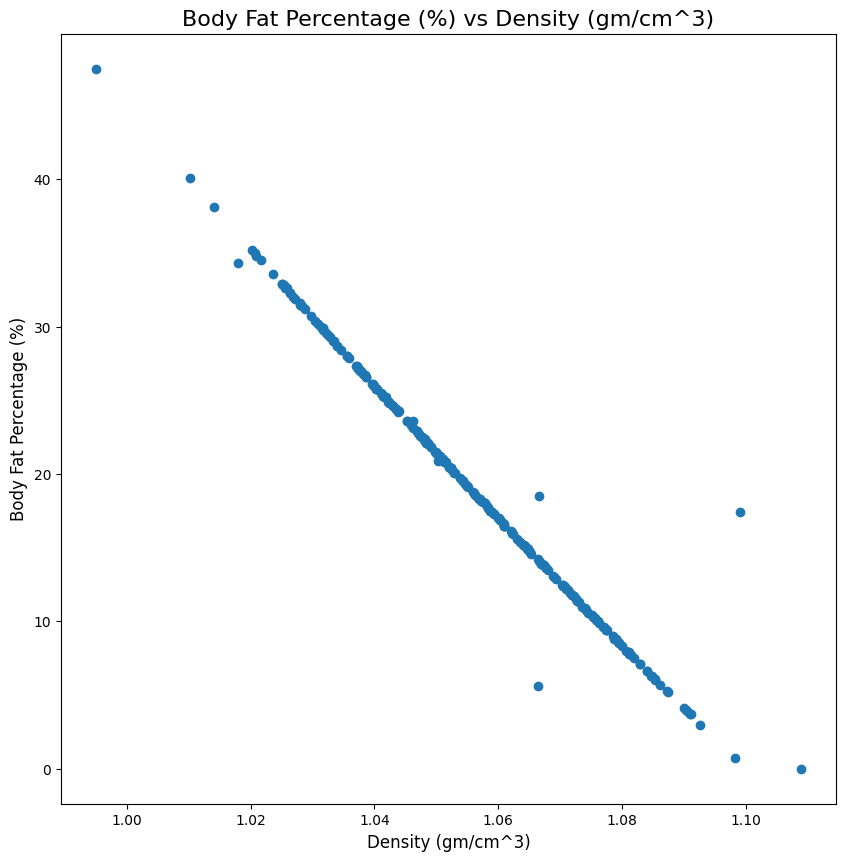

Density is the single feature with the highest correlation with body fat percentage.
This is shown by its correlation coefficient of 0.9757140717302929 with body fat percentage.


In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(body_fat["Density"], body_fat["target"])
plt.xlabel("Density (gm/cm^3)", fontsize=12)
plt.ylabel("Body Fat Percentage (%)", fontsize=12)
plt.title("Body Fat Percentage (%) vs Density (gm/cm^3)", fontsize=16)
plt.show()

print(f"Density is the single feature with the highest correlation with body fat percentage.")
print(f"This is shown by its correlation coefficient of {feature_target_corr["Density"]} with body fat percentage.")

<p>As stated above, body fat density has a correlation of about 0.976 and, as evidenced by the list of correlation coefficients between each feature and body fat percentage, body fat density is the single feature with the highest correlation with the body fat percentage.  To me, this also points to the, now obvious, assertion that body fat percentage and body fat density have an inverse relationship wherein higher density is associated with a lower body fat percentage and vice-versa.</p>

<h4>Feature 2: Height (inches)</h4>
<p>What I found to be most noteworthy about the height feature was how little it appears to be predictive of body fat percentage, as shown in the chart below:</p>

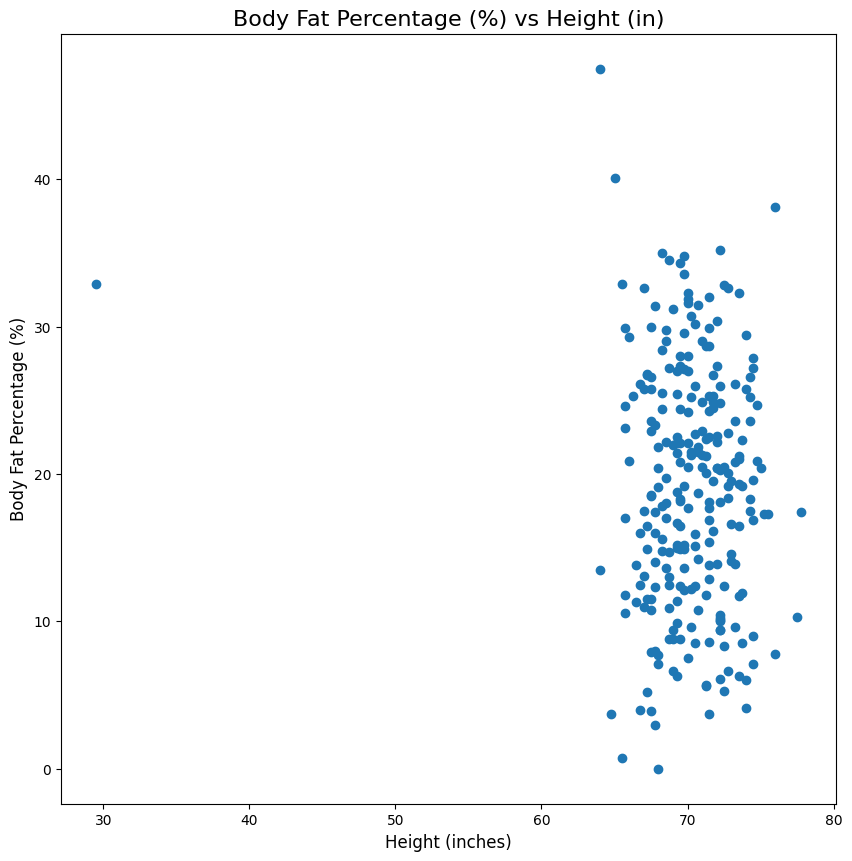

Height is the single feature with the lowest correlation with body fat percentage.
This is made apparent by its correlation coefficient of 0.008009424909372872 with body fat percentage.


In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(body_fat["Height"], body_fat["target"])
plt.xlabel("Height (inches)", fontsize=12)
plt.ylabel("Body Fat Percentage (%)", fontsize=12)
plt.title("Body Fat Percentage (%) vs Height (in)", fontsize=16)
plt.show()

print(f"Height is the single feature with the lowest correlation with body fat percentage.")
print(f"This is made apparent by its correlation coefficient of {feature_target_corr["Height"]} with body fat percentage.")

<p>Between height (inches) and the body fat percentage (%), what I found noteworthy about this relationship is how little it correlates with body fat percentage and, at the same time, how most samples are concentrated between a height of 65 and 75 inches, which makes sense as most American men of the time were within this range of height.  Finally, I also found the outlier (below the height of 30 inches) particularly striking.  Was this outlier due to recording error, or was it an actual height measurement?</p>

<h4>Feature 3: Age (years)</h4>
<p>What I found to be most noteworthy about the age feature was how widespread the data happen to be when measured against the body fat percentage, as shown in the chart below:</p>

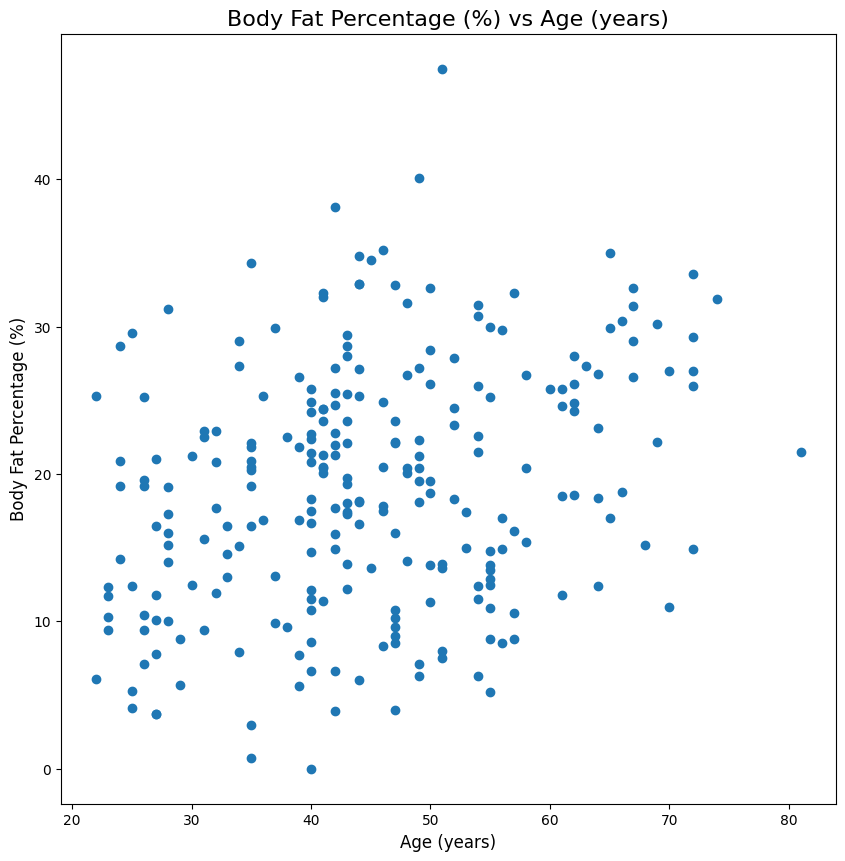

Age is the single feature with the second lowest correlation with body fat percentage.
This is made apparent by its correlation coefficient of 0.08494801963847155 with body fat percentage.
This is just above the lowest correlation coefficient (between Height and body fat percentage), which is 0.008009424909372872.


In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(body_fat["Age"], body_fat["target"])
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Body Fat Percentage (%)", fontsize=12)
plt.title("Body Fat Percentage (%) vs Age (years)", fontsize=16)
plt.show()

print(f"Age is the single feature with the second lowest correlation with body fat percentage.")
print(f"This is made apparent by its correlation coefficient of {feature_target_corr["Age"]} with body fat percentage.")
print(f"This is just above the lowest correlation coefficient (between Height and body fat percentage), which is {feature_target_corr["Height"]}.")

<p>What I found noteworthy about the scatterplot between body fat percentage (%) and age (years) deals with the lack of an apparent dependence and the high spread across both the x and y axes.  This is quite the opposite of the relationship between body fat percentage (%) and body fat density (gm/cm^3).  And, as confirmed by the statements above and the prior list of correlation coefficients between each feature and body fat percentage, age appears to be the single feature with the second lowest correlation with body fat percentage.</p>

### Step 4: Plotting a Feature Correlation Matrix

<h4>All Numeric Features (excluding the target body fat percentage)</h4>
<p>If only counting the feature columns, when not paired to themselves (which yields a perfect positive correlation), the most highly correlated pair of columns is that of the "Weight" and the "Hip" variables which yields a correlation coefficient of 0.9408841225678027, as shown in the heat map correlation matrix below.</p>

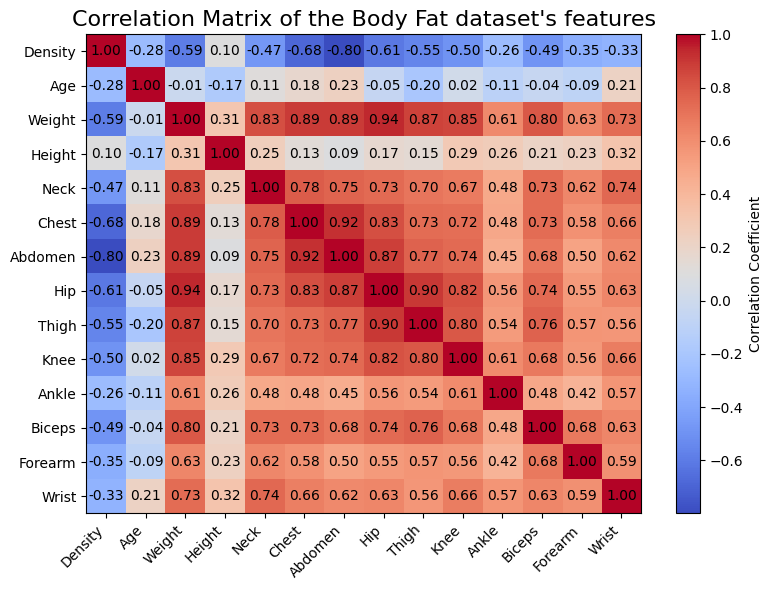

This correlation matrix shows that the highest correlation coefficient between the "Weight" and "Hip" features.
These two features have a correlation coefficient of 0.9408841225678027, which makes them the feature pair with the highest correlation.


In [ ]:
# YOUR CODE HERE

# Obtain only the features of the "Body Fat" dataset
body_fat_features = body_fat.drop(columns=['target'])

# Compute the correlation matrix
corr_matrix = body_fat_features.corr()

# Plot the correlation matrix
# Set the figure size to 8 x 6 inches
plt.figure(figsize=(8, 6))
# Plot a heatmap using the correlation matrix, coolwarm color map, and automated aspect ratio
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
# Plot a color bar
plt.colorbar(label="Correlation Coefficient")

# Add labels

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix of the Body Fat dataset's features", fontsize=16)
plt.tight_layout()

# Annotate the heatmap with correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.show()

# Print statement to find the actual value of the correlation coefficient between the "Density" and "target" columns
print(f"This correlation matrix shows that the highest correlation coefficient between the \"Weight\" and \"Hip\" features.")
print(f"These two features have a correlation coefficient of {body_fat['Weight'].corr(body_fat['Hip'])}, which makes them the feature pair with the highest correlation.")

<p>In addition to the fact that they are the feature column pair with the highest correlation, the scatterplot below demonstrates the high positive correlation between hip circumference (cm) and weight (lbs).</p>

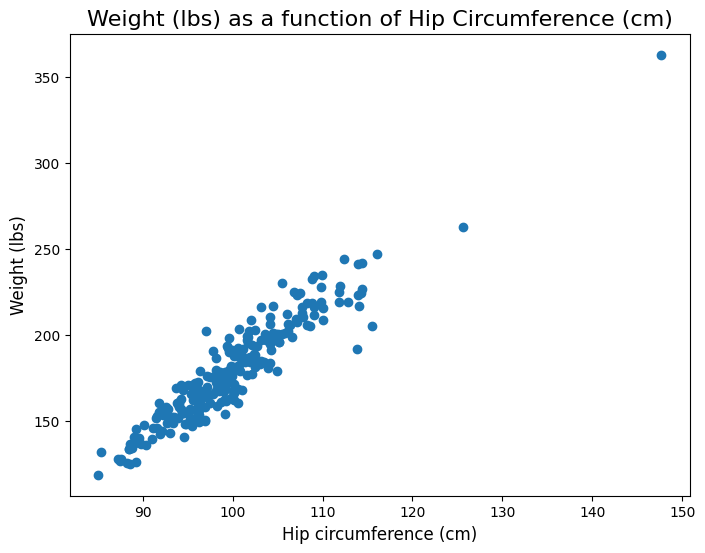

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(body_fat["Hip"], body_fat["Weight"])
plt.title("Weight (lbs) as a function of Hip Circumference (cm)", fontsize="16")
plt.xlabel("Hip circumference (cm)", fontsize="12")
plt.ylabel("Weight (lbs)", fontsize="12")
plt.show()

<h4>All Numeric Columns (including the target body fat percentage)</h4>
<p>If counting the target variable as a numeric column, when not paired to themselves (which yields a perfect positive correlation), the most highly correlated pair of columns is that of "Density (gm/cm^3)" and the "target" (body fat percentage) variables which yields a correlation coefficient of -0.9877824010025148, as shown in the heat map correlation matrix below.</p>

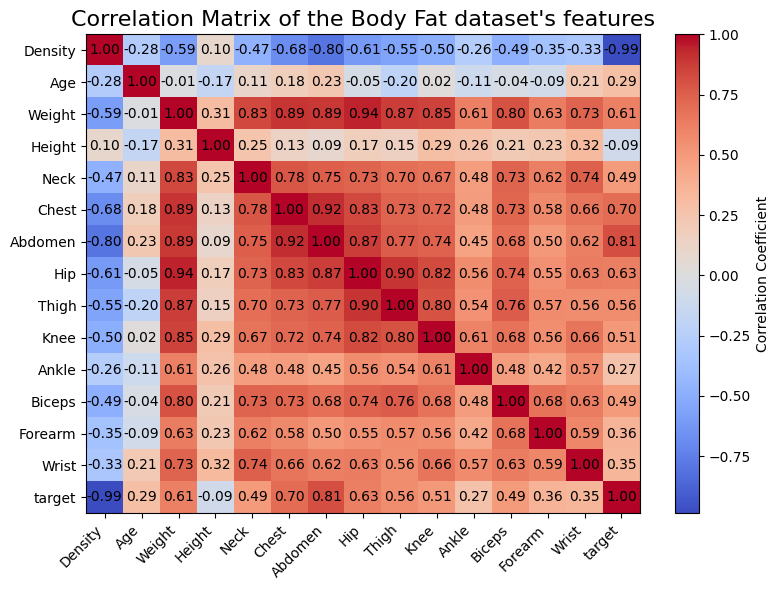

This correlation matrix shows that the highest correlation coefficient between the "Density" and "target" (body fat percentage) features.
These two features have a correlation coefficient of -0.9877824010025148, which makes them the feature pair with the highest correlation.


In [ ]:
# YOUR CODE HERE

# Compute the correlation matrix, including the target variable
corr_matrix = body_fat.corr()

# Plot the correlation matrix
# Set the figure size to 8 x 6 inches
plt.figure(figsize=(8, 6))
# Plot a heatmap using the correlation matrix, coolwarm color map, and automated aspect ratio
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
# Plot a color bar
plt.colorbar(label="Correlation Coefficient")

# Add labels

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix of the Body Fat dataset's features", fontsize=16)
plt.tight_layout()

# Annotate the heatmap with correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.show()

# Print statement to find the actual value of the correlation coefficient between the "Density" and "target" columns
print(f"This correlation matrix shows that the highest correlation coefficient between the \"Density\" and \"target\" (body fat percentage) features.")
print(f"These two features have a correlation coefficient of {body_fat['Density'].corr(body_fat['target'])}, which makes them the feature pair with the highest correlation.")

<p>As confirmed in the first individual feature scatterplot for the correlation between density and body fat percentage in problem 3, body fat density (gm/cm^3) and body fat percentage (%) have a very high negative correlation.  This makes sense as density is the single feature that serves as the best predictor of the target variable.</p>

### Step 5: Experimenting with 3 Unfamiliar Regression Modelling Techniques

<p>For (upcoming) problem 6, I chose to try Bayesian Ridge Regression, Support Vector Regression, and the K-Nearest Neighbors Classifier.</p>
<p>The relevant links to the scikit-learn documentation, and that of external sources, can be found below:</p>

<ul>
    <li>Bayesian Ridge Regression.
        <ul>
            <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html">Scikit-learn documentation</a> for Bayesian Ridge Regression.</li>
            <li>External source about Bayesian Ridge Regression at <a href="https://www.tutorialspoint.com/scikit_learn/scikit_learn_bayesian_ridge_regression.htm">TutorialsPoint</a>.</li>
        </ul>
    </li>
    <li>Support Vector Regression.
        <ul>
            <li><a href="https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py">Scikit-learn documentation</a> for Support Vector Regression.</li>
            <li>External source about Support Vector Regression at <a href="https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/">Geeks for Geeks</a>.</li>
        </ul>
    </li>
    <li>K-Nearest Neighbors Classifier.
        <ul>
            <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">Scikit-learn documentation</a> for the K-Nearest Neighbors Classifier.</li>
            <li>External source about the K-Nearest Neighbors Classifier at <a href="https://www.datacamp.com/tutorial/k-means-clustering-python">DataCamp</a>.</li>
        </ul>
    </li>
</ul>

I chose to explore these models for the following reasons:
- I wanted to explore a different way to approach linear regression, and so I decided to use Bayesian Ridge Regression to implement the Bayesian framework into linear regression.
- Throughout Milestone 1 and Milestone 2 in MOD B, I have explored support vector machines, which piqued my interest due to their accuracy and flexibility to be implemented as linear and non-linear techniques.  Thus, I chose to implement support vector regression (SVR) as a linear technique for better interpretability.
- Reading about K-Nearest Neighbors also piqued my interest as to how it can be implemented in a more practical setting.  As a result, I wanted to explore how to use the K-Nearest Neighbors classifier, practically, in this project.

### Step 6: Basic Implementation for the New Regression Modelling Techniques

#### Model 1: Bayesian Ridge Regression

Bayesian Ridge Regression "estimates a probabilistic model of the regression problem" using Bayesian techniques, such as assuming the output "from a probability distribution" instead of "estimating it as a single value." (<a href="https://www.tutorialspoint.com/scikit_learn/scikit_learn_bayesian_ridge_regression.htm">TutorialsPoint</a>)

#### Model 2: Support Vector Regression

Support vector regression (SVR) is a form of support vector machine (SVM) tailored towards regression that "tries to find a function that best predicts the continuous output value for a given input value" that can use both linear and non-linear kernels.  In this case, I implemented SVR using the linear kernel, meaning that the model utilizes "a simple dot product between two input vectors".  There are also more customization options through the hyperparameters which, for simplicity's sake, I have chosen not to implement in this project. (<a href="https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/">Geeks for Geeks</a>)

#### Model 3: K-Nearest Neighbors Regression

K-Nearest Neighbors uses the average of k neighbors to predict the target value, in this case, to predict the body fat percentage.  However, the choice of the proper figure to assign to k is arbitrary.  Hence, I used my output for problem 10 to determine the proper k.

For this exploration, I used the standardized K-Nearest Neighbors regression pipeline model (found in problem 8) to determine the proper choice for k neighbors as the standardized pipeline set of models yielded the lowest L2 losses and highest R-squared scores of all three iterations for each set of models.

The results of this exploration are as follows:

k = 2 (trained on the entire dataset without split):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9992015457315645.
- The calculated L2 loss (mean squared error) for this model was 4.717767889445389.

k = 2 (trained on the entire dataset split into training and testing sets):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9945135718602518.
- The calculated L2 loss (mean squared error) for this model was 13.805783234951893.


k = 3 (trained on the entire dataset without split):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9989050957204472.
- The calculated L2 loss (mean squared error) for this model was 5.441962018842596.

k = 3 (trained on the entire dataset split into training and testing sets):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9940212147233608.
- The calculated L2 loss (mean squared error) for this model was 13.231720453545224.


k = 4 (trained on the entire dataset without split):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9986805292513966.
- The calculated L2 loss (mean squared error) for this model was 5.826428459963933.

k = 4 (trained on the entire dataset split into training and testing sets):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.99332620908144.
- The calculated L2 loss (mean squared error) for this model was 13.838504079720888.


k = 5 (trained on the entire dataset without split):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.998491903572973.
- The calculated L2 loss (mean squared error) for this model was 6.310403120648124.

k = 5 (trained on the entire dataset split into training and testing sets):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9940497717919622.
- The calculated L2 loss (mean squared error) for this model was 12.289559971387089.


k = 6 (trained on the entire dataset without split):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9983128395365997.
- The calculated L2 loss (mean squared error) for this model was 7.169629554447581.

k = 6 (trained on the entire dataset split into training and testing sets):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9933998941298214.
- The calculated L2 loss (mean squared error) for this model was 13.04303843118297.


k = 7 (trained on the entire dataset without split):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9982128117421972.
- The calculated L2 loss (mean squared error) for this model was 8.015674499976928.

k = 7 (trained on the entire dataset split into training and testing sets):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9935194770744762.
- The calculated L2 loss (mean squared error) for this model was 12.977074174206786.


k = 8 (trained on the entire dataset without split):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9980399869287783.
- The calculated L2 loss (mean squared error) for this model was 8.419046897507009.

k = 8 (trained on the entire dataset split into training and testing sets):

- The ninth model was the Standardized K-Nearest Neighbors Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
- The calculated R-squared score for this model was 0.9932207591271673.
- The calculated L2 loss (mean squared error) for this model was 13.747324626463628.

The results of this analysis point to k = 5 as the ideal combination of minimizing complexity and the L2 loss for the model when trained on the entire dataset without splitting and when the dataset is split into training and testing sets.

So, for implementing the K-Nearest Neighbors Regression model on both the unsplit dataset and the dataset split into training and testing portions, I decided to keep this figure consistent at k = 5.

#### Structure for Models in Problems 6 - 8

For the remainder of Problem 6, as well as for the entirety of Problems 7 and 8, I have structured the models in the following manner:

Models:
- Model 1 indicates Bayesian Ridge Regression.
- Model 2 indicates Support Vector Regression.
- Model 3 indicates K-Nearest Neighbors Regression.

Unsplit vs Split:
- Type A indicates training, fitting, and predicting (each wherever relevant) on the unsplit Body Fat dataset.
- Type B indicates training, fitting, and predicting (each wherever relevant) on the Body Fat dataset split into the training set (used for training and fitting) and testing set (used for predicting).

Problem Definitions:
- Problem 6 contains the most basic implementation of each model.
- Problem 7 contains the five-fold cross-validated implementation of each model and yields no predictions as cross-validation simply tests the model on each of the five folds, determined at random by scikit-learn.
- Problem 8 subjects each model to a scikit-learn pipeline which combines preprocessing and standardization (to a mean of 0 and a standard deviation of 1) of the data in the Body Fat dataset to implement principal component analysis (PCA) to best predict body fat percentage (the target value).

For instance, Model 1A in Problem 6 would denote the most basic implementation of Bayesian Ridge Regression trained, fitted, and predicted using the unsplit Body Fat dataset.  Meanwhile, Model 3B in Problem 8 would denote the pipeline which subjects the model to preprocessing and standardization to perform PCA and best predict for the body fat percentage using data split into training and testing sets.

#### Import and Split

Beginning with the rest of problem 6, the following code is the import for splitting the dataset into training and testing sets for use in problems 6 - 8.

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(body_fat_features, body_fat["target"], test_size=0.2, random_state=2024)

#### Model 1A: Bayesian Ridge Regression Model (unsplit)

The first model that I will implement for problem 6 trains the Bayesian Ridge Regression Model on the Body Fat dataset without splitting it into training and testing sets.  

The following is the code to create, fit, and predict body fat percentage using said model.

In [ ]:
# Create and fit the model
bayesian_ridge_model = sklearn.linear_model.BayesianRidge().fit(body_fat_features, body_fat["target"])

# Predict body fat percentage using the features
bayesian_ridge_predictions = bayesian_ridge_model.predict(body_fat_features)

The following code plots these predicted values against the actual body fat percentages in the original dataset.

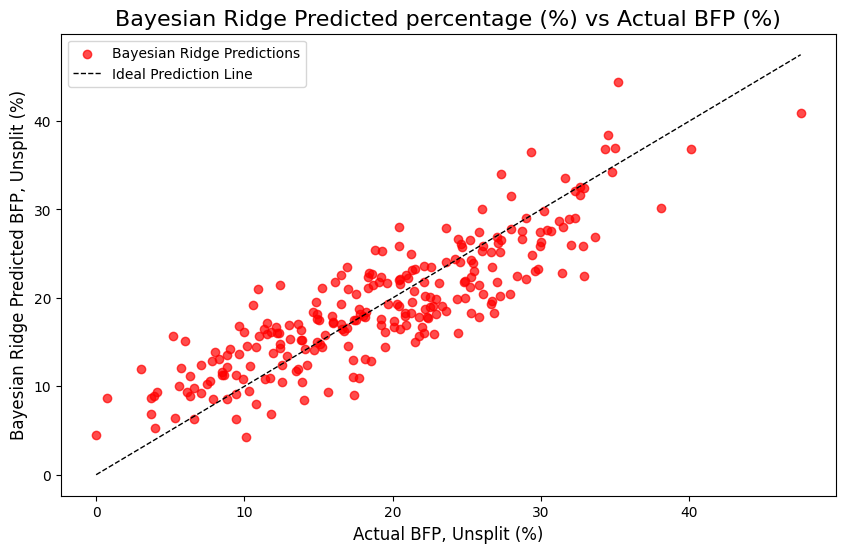

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(body_fat["target"], bayesian_ridge_predictions, alpha=0.7, label="Bayesian Ridge Predictions", color="red")
# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("Bayesian Ridge Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Unsplit (%)", fontsize=12)
plt.ylabel("Bayesian Ridge Predicted BFP, Unsplit (%)", fontsize=12)
plt.show()
plt.close()

#### Model 1B: Bayesian Ridge Regression Model (split)

The second model that I will implement for problem 6 trains the Bayesian Ridge Regression Model on the Body Fat dataset split into training and testing sets.  

The following is the code to create, fit, and predict body fat percentage using said model.

In [ ]:
# Create and fit the model
refit_bayesian_ridge_model = sklearn.linear_model.BayesianRidge().fit(train_features, train_target)

# Predict body fat percentage using the testing features
refit_bayesian_ridge_predictions = refit_bayesian_ridge_model.predict(test_features)

The following code plots these predicted values against the actual body fat percentages in the testing set.

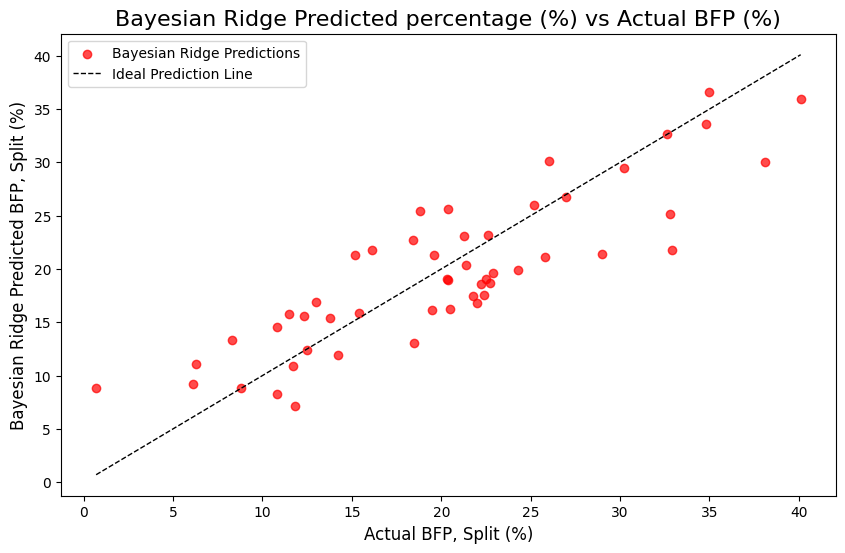

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_target, refit_bayesian_ridge_predictions, alpha=0.7, label="Bayesian Ridge Predictions", color="red")
# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("Bayesian Ridge Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Split (%)", fontsize=12)
plt.ylabel("Bayesian Ridge Predicted BFP, Split (%)", fontsize=12)
plt.show()
plt.close()

#### Model 2A: Support Vector Regression Model (unsplit)

The third model that I will implement for problem 6 trains the Support Vector Regression Model on the Body Fat dataset without splitting it into training and testing sets.  

The following is the code to create, fit, and predict body fat percentage using said model.

In [ ]:
from sklearn import svm

# Create and fit the model
svr_model = svm.SVR(kernel="linear").fit(body_fat_features, body_fat["target"])

# Predict body fat percentage using the features
svr_predictions = svr_model.predict(body_fat_features)

The following code plots these predicted values against the actual body fat percentages in the original dataset.

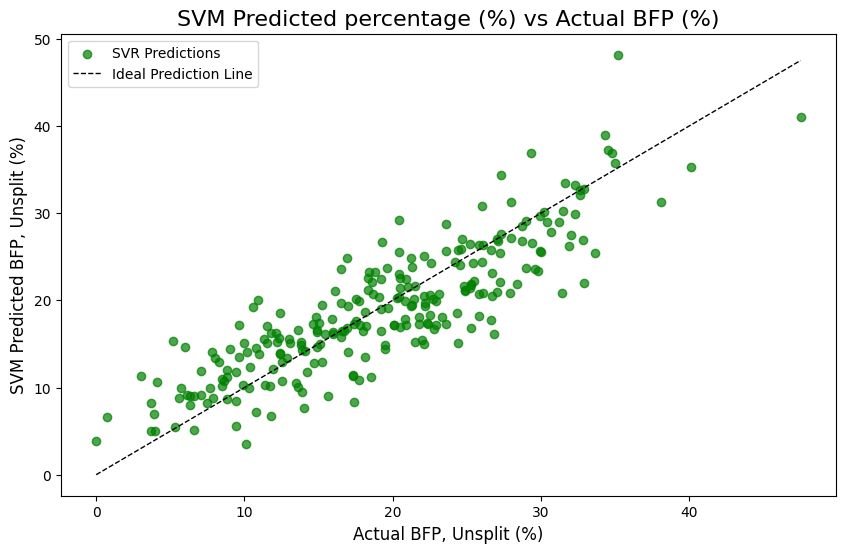

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(body_fat["target"], svr_predictions, alpha=0.7, label="SVR Predictions", color="green")
# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("SVM Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Unsplit (%)", fontsize=12)
plt.ylabel("SVM Predicted BFP, Unsplit (%)", fontsize=12)
plt.show()
plt.close()

#### Model 2B: Support Vector Regression Model (split)

The fourth model that I will implement for problem 6 trains the Support Vector Regression Model on the Body Fat dataset after splitting it into training and testing sets.  

The following is the code to create, fit, and predict body fat percentage using said model.

In [ ]:
refit_svr_model = svm.SVR(kernel="linear").fit(train_features, train_target)
refit_svr_predictions = refit_svr_model.predict(test_features)

The following code plots these predicted values against the actual body fat percentages in the original dataset.

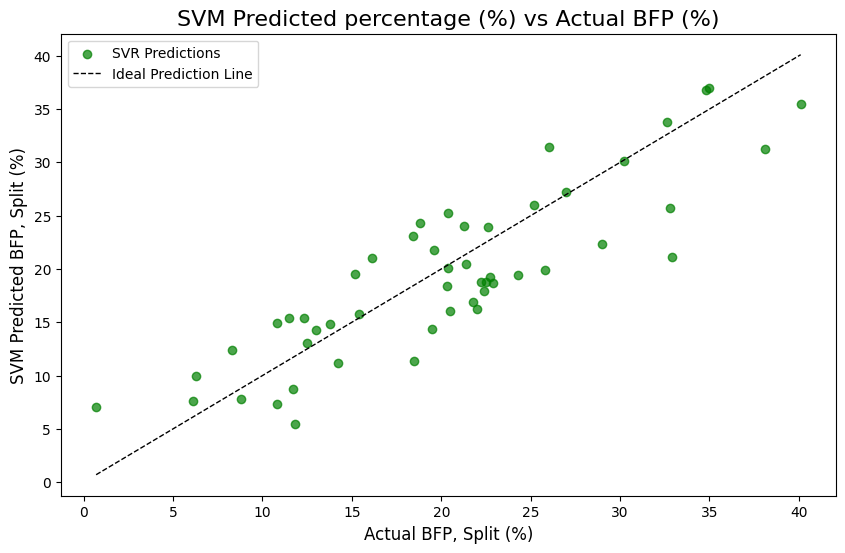

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_target, refit_svr_predictions, alpha=0.7, label="SVR Predictions", color="green")
# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("SVM Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Split (%)", fontsize=12)
plt.ylabel("SVM Predicted BFP, Split (%)", fontsize=12)
plt.show()
plt.close()

<h4>Model 3A: K-Nearest Neighbors Regression (unsplit)</h4>
<p>The fifth model that I will implement for problem 6 trains the K-Nearest Neighbors Regression Model on the Body Fat dataset without splitting it into training and testing sets.</p>
<p>My implementation of the K-Nearest Neighbors on the Body Fat dataset is shown below by importing the model, instantiating it, fitting it to the Body Fat dataset, then predicting body fat percentage using the Body Fat dataset features.</p>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(body_fat_features, body_fat["target"])
knn_predictions = knn_model.predict(body_fat_features)

Meanwhile, the plot for the predictions by K-Nearest Neighbors, where k = 5, for the unsplit data can be found below and is plotted against the ideal prediction line for the target values:

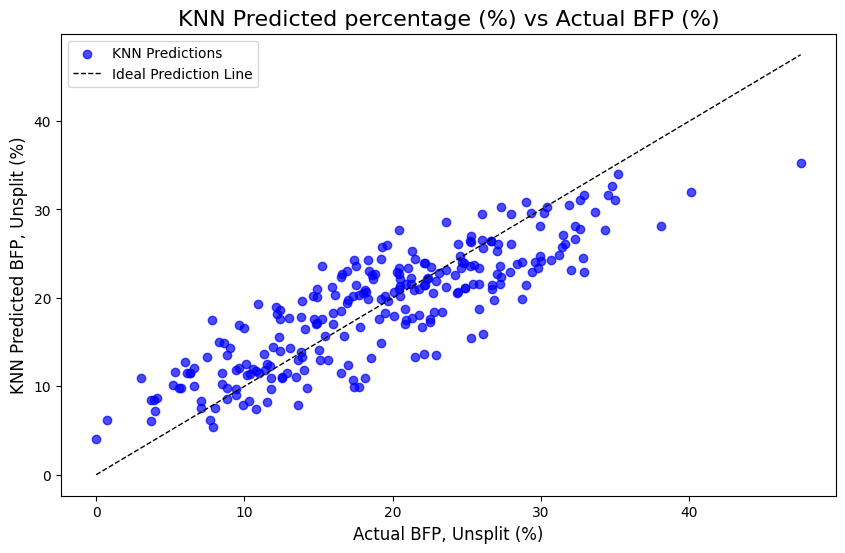

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(body_fat["target"], knn_predictions, alpha=0.7, label="KNN Predictions", color="blue")
# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("KNN Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Unsplit (%)", fontsize=12)
plt.ylabel("KNN Predicted BFP, Unsplit (%)", fontsize=12)
plt.show()
plt.close()

#### Model 3B: K-Nearest Neighbors Regression Model (split)

The sixth model that I will implement for problem 6 trains the K-Nearest Neighbors Regression Model on the Body Fat dataset after splitting it into training and testing sets.  

The following is the code to create, fit, and predict body fat percentage using the test feature data through said model.

In [ ]:
refit_knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(body_fat_features, body_fat["target"])
refit_knn_model.fit(train_features, train_target)
print(refit_knn_model)
refit_knn_predictions = refit_knn_model.predict(test_features)

KNeighborsRegressor()


Meanwhile, the plot for the predictions by K-Nearest Neighbors, where k = 5, for the testing data can be found below and is plotted against the ideal prediction line for the target values:

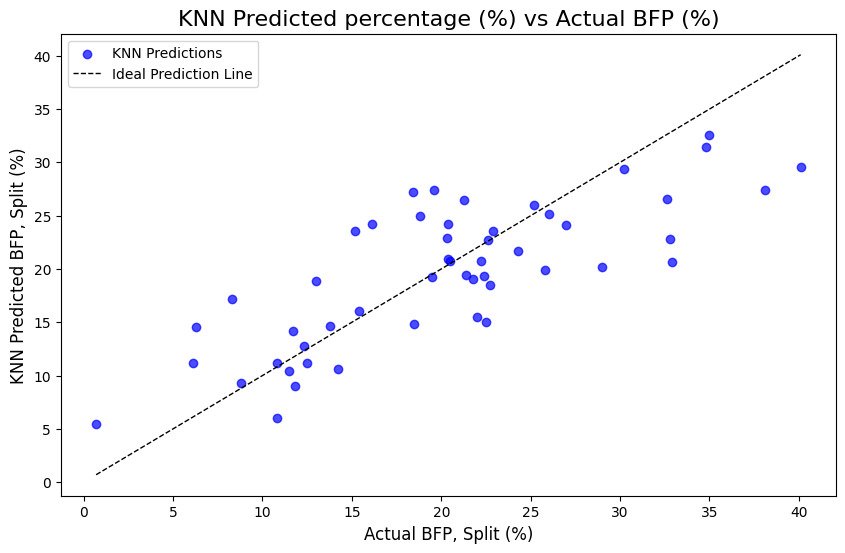

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_target, refit_knn_predictions, alpha=0.7, label="KNN Predictions", color="blue")
# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("KNN Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Split (%)", fontsize=12)
plt.ylabel("KNN Predicted BFP, Split (%)", fontsize=12)
plt.show()
plt.close()

#### Summary for models fit on the entire unsplit dataset (Group A)

The following are summaries of the L2 and the L1 losses for the Bayesian Ridge Regression, Support Vector Regression, and the K-Nearest Neighbors Regression models fit on the entire unsplit dataset.

In [ ]:
# Bayesian Ridge Model:
# L2 loss (Mean Squared Error) for the Bayesian Ridge Model
bayesian_ridge_mse = np.mean((body_fat["target"] - bayesian_ridge_predictions)**2)
print(f"The L2 loss (mean squared error) for the Bayesian Ridge Model is {bayesian_ridge_mse}.")
# L1 loss (Mean Absolute Error) for the Bayesian Ridge Model
bayesian_ridge_mae = np.mean(np.abs(body_fat["target"] - bayesian_ridge_predictions))
print(f"Meanwhile, the L1 loss (mean absolute error) of the Bayesian Ridge model is {bayesian_ridge_mae}.")
print()

# Support Vector Regression Model:
# L2 loss (Mean Squared Error) for the Support Vector Regression Model
svr_mse = np.mean((body_fat["target"] - svr_predictions)**2)
print(f"The L2 loss (mean squared error) for the Support Vector Regression Model is {svr_mse}.")
# L1 loss (Mean Absolute Error) for the Support Vector Regression Model
svr_mae = np.mean(np.abs(body_fat["target"] - svr_predictions))
print(f"Meanwhile, the L1 loss (mean absolute error) of the Support Vector Regression model is {svr_mae}.")
print()

# K-Nearest Neighbors Model:
# L2 loss (Mean Squared Error) for the K-Nearest Neighbors Model
knn_mse = np.mean((body_fat["target"] - knn_predictions)**2)
print(f"The L2 loss (mean squared error) for the K-Nearest Neighbors Model is {knn_mse}.")
# L1 loss (Mean Absolute Error) for the K-Nearest Neighbors Model
knn_mae = np.mean(np.abs(body_fat["target"] - knn_predictions))
print(f"Meanwhile, the L1 loss (mean absolute error) of the K-Nearest Neighbors model is {knn_mae}.")
print()

The L2 loss (mean squared error) for the Bayesian Ridge Model is 17.85249298352007.
Meanwhile, the L1 loss (mean absolute error) of the Bayesian Ridge model is 3.454327161802697.

The L2 loss (mean squared error) for the Support Vector Regression Model is 18.056185016303242.
Meanwhile, the L1 loss (mean absolute error) of the Support Vector Regression model is 3.3837088562142155.

The L2 loss (mean squared error) for the K-Nearest Neighbors Model is 18.919979217185883.
Meanwhile, the L1 loss (mean absolute error) of the K-Nearest Neighbors model is 3.5410317417175055.



A plot containing plots for all basic models fit on the entire unsplit dataset can be found below.

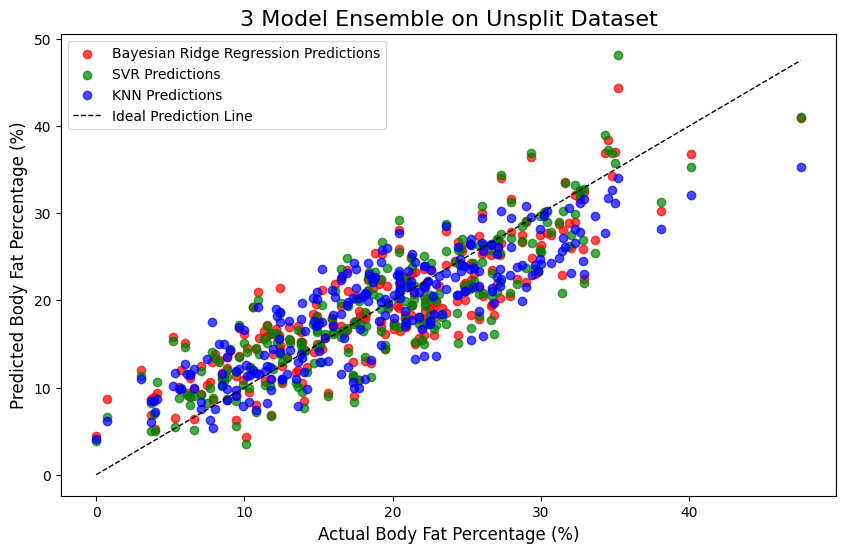

In [ ]:
plt.figure(figsize=(10, 6))

# Bayesian Regression Predictions
plt.scatter(body_fat["target"], bayesian_ridge_predictions, alpha=0.7, label="Bayesian Ridge Regression Predictions", color="red")

# Support Vector Regression Predictions
plt.scatter(body_fat["target"], svr_predictions, alpha=0.7, label="SVR Predictions", color="green")

# K-Nearest Neighbors Predictions
plt.scatter(body_fat["target"], knn_predictions, alpha=0.7, label="KNN Predictions", color="blue")

# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.title("3 Model Ensemble on Unsplit Dataset", fontsize=16)
plt.xlabel("Actual Body Fat Percentage (%)", fontsize=12)
plt.ylabel("Predicted Body Fat Percentage (%)", fontsize=12)
plt.legend()

plt.show()
plt.close()

#### Summary for models fit on the split dataset (Group B)

The following are summaries of the L2 and the L1 losses for the Bayesian Ridge Regression, Support Vector Regression, and the K-Nearest Neighbors Regression models fit on the entire dataset, split into training and testing sets.

In [ ]:
# Bayesian Ridge Model:
# L2 loss (Mean Squared Error) for the Bayesian Ridge Model
refit_bayesian_ridge_mse = np.mean((test_target - refit_bayesian_ridge_predictions)**2)
print(f"The L2 loss (mean squared error) for the Bayesian Ridge Model is {refit_bayesian_ridge_mse}.")
# L1 loss (Mean Absolute Error) for the Bayesian Ridge Model
refit_bayesian_ridge_mae = np.mean(np.abs(test_target - refit_bayesian_ridge_predictions))
print(f"Meanwhile, the L1 loss (mean absolute error) of the Bayesian Ridge model is {refit_bayesian_ridge_mae}.")
print()

# Support Vector Regression Model:
# L2 loss (Mean Squared Error) for the Support Vector Regression Model
refit_svr_mse = np.mean((test_target - refit_svr_predictions)**2)
print(f"The L2 loss (mean squared error) for the Support Vector Regression Model is {refit_svr_mse}.")
# L1 loss (Mean Absolute Error) for the Support Vector Regression Model
refit_svr_mae = np.mean(np.abs(test_target - refit_svr_predictions))
print(f"Meanwhile, the L1 loss (mean absolute error) of the Support Vector Regression model is {refit_svr_mae}.")
print()

# K-Nearest Neighbors Model:
# L2 loss (Mean Squared Error) for the K-Nearest Neighbors Model
refit_knn_mse = np.mean((test_target - refit_knn_predictions)**2)
print(f"The L2 loss (mean squared error) for the K-Nearest Neighbors Model is {refit_knn_mse}.")
# L1 loss (Mean Absolute Error) for the K-Nearest Neighbors Model
refit_knn_mae = np.mean(np.abs(test_target - refit_knn_predictions))
print(f"Meanwhile, the L1 loss (mean absolute error) of the K-Nearest Neighbors model is {refit_knn_mae}.")
print()

The L2 loss (mean squared error) for the Bayesian Ridge Model is 18.76728204648941.
Meanwhile, the L1 loss (mean absolute error) of the Bayesian Ridge model is 3.5885045444325363.

The L2 loss (mean squared error) for the Support Vector Regression Model is 18.69119946313471.
Meanwhile, the L1 loss (mean absolute error) of the Support Vector Regression model is 3.651727660123317.

The L2 loss (mean squared error) for the K-Nearest Neighbors Model is 28.567646174982894.
Meanwhile, the L1 loss (mean absolute error) of the K-Nearest Neighbors model is 4.187058774396484.



A plot containing plots for all basic models fit on the split dataset can be found below.

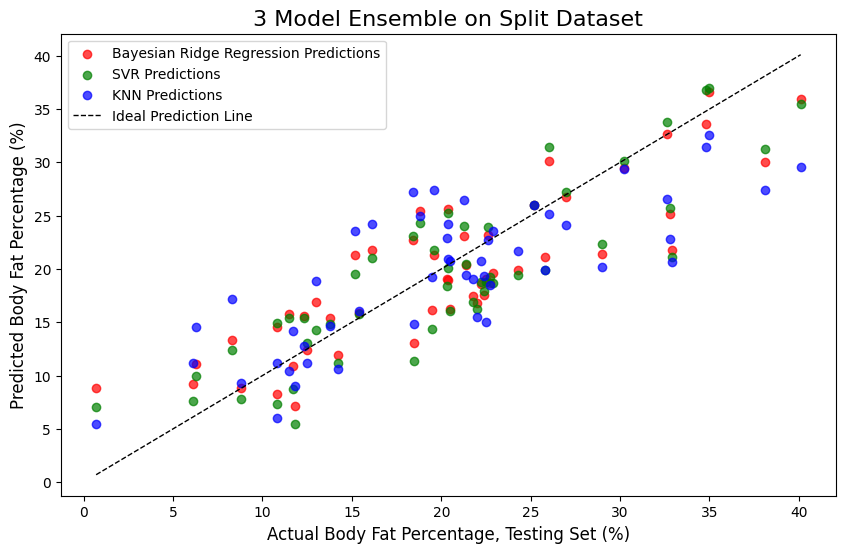

In [ ]:
plt.figure(figsize=(10, 6))

# Bayesian Regression Predictions
plt.scatter(test_target, refit_bayesian_ridge_predictions, alpha=0.7, label="Bayesian Ridge Regression Predictions", color="red")

# Support Vector Regression Predictions
plt.scatter(test_target, refit_svr_predictions, alpha=0.7, label="SVR Predictions", color="green")

# K-Nearest Neighbors Predictions
plt.scatter(test_target, refit_knn_predictions, alpha=0.7, label="KNN Predictions", color="blue")

# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.title("3 Model Ensemble on Split Dataset", fontsize=16)
plt.xlabel("Actual Body Fat Percentage, Testing Set (%)", fontsize=12)
plt.ylabel("Predicted Body Fat Percentage (%)", fontsize=12)
plt.legend()

plt.show()
plt.close()

### Step 7: Five-Fold Cross-Validation for the New Regression Modelling Techniques

#### Import Cross Validate

The following code is the import for cross validation for use in the rest of problem 7.

In [ ]:
# YOUR CODE HERE

from sklearn.model_selection import cross_validate

#### Set the Scoring

The following code will specify the two metrics, R-squared and MSE (L2 loss), that I would like to find out for the following cross-validated models.

In [ ]:
# Specify multiple metrics
scoring = ["r2", "neg_mean_squared_error"]

#### Model 1A: Cross-Validated Bayesian Ridge Regression Model (unsplit)

The first model that I will implement for problem 7 trains and cross-validates the Bayesian Ridge Regression Model on the Body Fat dataset without splitting it into training and testing sets.

Bayesian Ridge Regression "estimates a probabilistic model of the regression problem" using Bayesian techniques, such as assuming the output "from a probability distribution" instead of "estimating it as a single value." (TutorialsPoint)

The following is the code to create, fit, and score the cross-validated model's ability to predict body fat percentage through its R-squared and L2 loss metrics.

In [ ]:
# YOUR CODE HERE

bayesian_ridge_cv_model = sklearn.linear_model.BayesianRidge()
bayesian_ridge_cv = cross_validate(bayesian_ridge_cv_model, body_fat_features, body_fat["target"], scoring=scoring, cv=5, return_train_score=True)

bayesian_ridge_cv_r2_all = bayesian_ridge_cv["test_r2"]
bayesian_ridge_cv_mse_all = -bayesian_ridge_cv["test_neg_mean_squared_error"]

bayesian_ridge_cv_r2 = bayesian_ridge_cv_r2_all.mean()
bayesian_ridge_cv_mse = bayesian_ridge_cv_mse_all.mean()

print(f"The R-squared values for each fold are the following: {bayesian_ridge_cv_r2_all}")
print(f"The L2 losses for each fold are the following: {bayesian_ridge_cv_mse_all}")

The R-squared values for each fold are the following: [0.75523444 0.70668746 0.30420197 0.75120682 0.69307258]
The L2 losses for each fold are the following: [23.05725052 18.74386172 20.40675725 15.65960844 27.50698858]


#### Model 1B: Cross-Validated Bayesian Ridge Regression Model (split)

The second model that I will implement for problem 7 trains and cross validates the Bayesian Ridge Regression Model on the Body Fat dataset split into training and testing sets.

The following is the code to create, fit, and then score for the model's ability to predict body fat percentage across multiple validation folds through its R-squared and L2 loss metrics.

In [ ]:
refit_bayesian_ridge_cv_model = sklearn.linear_model.BayesianRidge()
refit_bayesian_ridge_cv = cross_validate(refit_bayesian_ridge_cv_model, test_features, test_target, scoring=scoring, cv=5, return_train_score=True)

refit_bayesian_ridge_cv_r2_all = refit_bayesian_ridge_cv["test_r2"]
refit_bayesian_ridge_cv_mse_all = -refit_bayesian_ridge_cv["test_neg_mean_squared_error"]

refit_bayesian_ridge_cv_r2 = refit_bayesian_ridge_cv_r2_all.mean()
refit_bayesian_ridge_cv_mse = refit_bayesian_ridge_cv_mse_all.mean()

print(f"The R-squared values for each fold are the following: {refit_bayesian_ridge_cv_r2_all}")
print(f"The L2 losses for each fold are the following: {refit_bayesian_ridge_cv_mse_all}")

The R-squared values for each fold are the following: [0.60610167 0.72743954 0.77166718 0.46295873 0.6587918 ]
The L2 losses for each fold are the following: [18.45312649  8.36858726 20.79757865 53.37137819 21.13771081]


#### Model 2A: Cross-Validated Support Vector Regression Model (unsplit)

The third model that I will implement for problem 7 trains and cross-validates the Support Vector Regression Model on the Body Fat dataset without splitting it into training and testing sets.

The following is the code to create, fit, and then score for the model's ability to predict body fat percentage across multiple validation folds.

In [ ]:
svr_cv_model = svm.SVR(kernel="linear")
svr_cv = cross_validate(svr_cv_model, body_fat_features, body_fat["target"], scoring=scoring, cv=5, return_train_score=True)

svr_cv_r2_all = svr_cv["test_r2"]
svr_cv_mse_all = -svr_cv["test_neg_mean_squared_error"]

svr_cv_r2 = svr_cv_r2_all.mean()
svr_cv_mse = svr_cv_mse_all.mean()

print(f"The R-squared values for each fold are the following: {svr_cv_r2_all}")
print(f"The L2 losses for each fold are the following: {svr_cv_mse_all}")

The R-squared values for each fold are the following: [0.78684015 0.72593326 0.1779125  0.76078042 0.7133225 ]
The L2 losses for each fold are the following: [20.0799499  17.51397721 24.11064605 15.05702421 25.6921806 ]


#### Model 2B: Cross-Validated Support Vector Regression Model (split)

The fourth model that I will implement for problem 6 trains the Support Vector Regression Model on the Body Fat dataset after splitting it into training and testing sets.

The following is the code to create, fit, and then score for the model's ability to predict body fat percentage across multiple validation folds.

In [ ]:
refit_svr_cv_model = svm.SVR(kernel="linear")
refit_svr_cv = cross_validate(refit_svr_cv_model, test_features, test_target, scoring=scoring, cv=5, return_train_score=True)

refit_svr_cv_r2_all = refit_svr_cv["test_r2"]
refit_svr_cv_mse_all = -refit_svr_cv["test_neg_mean_squared_error"]

refit_svr_cv_r2 = refit_svr_cv_r2_all.mean()
refit_svr_cv_mse = refit_svr_cv_mse_all.mean()

print(f"The R-squared values for each fold are the following: {refit_svr_cv_r2_all}")
print(f"The L2 losses for each fold are the following: {refit_svr_cv_mse_all}")

The R-squared values for each fold are the following: [0.52370673 0.36389321 0.66045897 0.48176732 0.73459705]
The L2 losses for each fold are the following: [22.31311791 19.53076845 30.92692207 51.50217352 16.44160577]


#### Model 3A: Cross-Validated K-Nearest Neighbors Regression (unsplit)

The fifth model that I will implement for problem 6 trains the K-Nearest Neighbors Regression Model on the Body Fat dataset without splitting it into training and testing sets.

My implementation of cross-validated K-Nearest Neighbors Regression on the Body Fat dataset is shown below by importing the model, instantiating it, cross-validating it, and then score for the model's ability to predict body fat percentage across multiple validation folds.

In [ ]:
knn_cv_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_cv = cross_validate(knn_cv_model, body_fat_features, body_fat["target"], scoring=scoring, cv=5, return_train_score=True)

knn_cv_r2_all = knn_cv["test_r2"]
knn_cv_mse_all = -knn_cv["test_neg_mean_squared_error"]

knn_cv_r2 = knn_cv_r2_all.mean()
knn_cv_mse = knn_cv_mse_all.mean()

print(f"The R-squared values for each fold are the following: {knn_cv_r2_all}")
print(f"The L2 losses for each fold are the following: {knn_cv_mse_all}")

The R-squared values for each fold are the following: [ 0.54426939  0.42362777 -0.06348363  0.53414687  0.54368842]
The L2 losses for each fold are the following: [42.93044715 36.83252468 31.19044808 29.32185562 40.89487115]


#### Model 3B: Cross-Validated K-Nearest Neighbors Regression Model (split)

The sixth model that I will implement for problem 6 trains the K-Nearest Neighbors Regression Model on the Body Fat dataset after splitting it into training and testing sets.

The following is the code to create, fit, and then score for the model's ability to predict body fat percentage across multiple validation folds.

In [ ]:
refit_knn_cv_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
refit_knn_cv = cross_validate(refit_knn_cv_model, test_features, test_target, scoring=scoring, cv=5, return_train_score=True)

refit_knn_cv_r2_all = refit_knn_cv["test_r2"]
refit_knn_cv_mse_all = -refit_knn_cv["test_neg_mean_squared_error"]

refit_knn_cv_r2 = refit_knn_cv_r2_all.mean()
refit_knn_cv_mse = refit_knn_cv_mse_all.mean()

print(f"The R-squared values for each fold are the following: {refit_knn_cv_r2_all}")
print(f"The L2 losses for each fold are the following: {refit_knn_cv_mse_all}")

The R-squared values for each fold are the following: [-0.15896348  0.53703412  0.4813357   0.15846305  0.67700517]
The L2 losses for each fold are the following: [54.29446603 14.21471916 47.24227339 83.63228252 20.00939931]


#### L2 Losses for Cross-Validated Models Fitted on Unsplit Data (Type A)

The following list out the L2 losses for cross-validated models fitted on unsplit data in the Body Fat dataset using the Bayesian Ridge Regression, Support Vector Regression, and K-Nearest Neighbors Regression techniques.

In [ ]:
# L2 loss (Mean Squared Error) for the Bayesian Ridge Regression Model
print(f"The L2 loss (mean squared error) for the Bayesian Ridge Regression Model\nsubject to 5-fold cross-validation is {bayesian_ridge_cv_mse}.")
print()

# L2 loss (Mean Squared Error) for the Support Vector Regression Model
print(f"The L2 loss (mean squared error) for the Support Vector Regression Model\nsubject to 5-fold cross-validation is {svr_cv_mse}.")
print()

# L2 loss (Mean Squared Error) for the K-Nearest Neighbors Regression Model
print(f"The L2 loss (mean squared error) for the K-Nearest Neighbors Regression Model\nsubject to 5-fold cross-validation is {knn_cv_mse}.")

The L2 loss (mean squared error) for the Bayesian Ridge Regression Model
subject to 5-fold cross-validation is 21.07489330251561.

The L2 loss (mean squared error) for the Support Vector Regression Model
subject to 5-fold cross-validation is 20.490755593361335.

The L2 loss (mean squared error) for the K-Nearest Neighbors Regression Model
subject to 5-fold cross-validation is 36.2340293348675.


As a reminder, the L2 losses for the basic implementation of each model that was trained on the unsplit data set were:

In [ ]:
# Bayesian Ridge Model:
# L2 loss (Mean Squared Error) for the Bayesian Ridge Model
print(f"The L2 loss (mean squared error) for the original Bayesian Ridge Model on unsplit data is {bayesian_ridge_mse}.")

# Support Vector Regression Model:
# L2 loss (Mean Squared Error) for the Support Vector Regression Model
print(f"The L2 loss (mean squared error) for the original Support Vector Regression Model on unsplit data is {svr_mse}.")

# K-Nearest Neighbors Model:
# L2 loss (Mean Squared Error) for the K-Nearest Neighbors Model
print(f"The L2 loss (mean squared error) for the original K-Nearest Neighbors Model on unsplit data is {knn_mse}.")

The L2 loss (mean squared error) for the original Bayesian Ridge Model on unsplit data is 17.85249298352007.
The L2 loss (mean squared error) for the original Support Vector Regression Model on unsplit data is 18.056185016303242.
The L2 loss (mean squared error) for the original K-Nearest Neighbors Model on unsplit data is 18.919979217185883.


What this indicates is that, overall, the L2 loss found when using 5-fold cross-validation and the unsplit Body Fat dataset is, on average, higher than the L2 loss found in the original model set using the unsplit Body Fat dataset.  

This difference is apparent across all three models, but most apparent for the difference between the L2 loss for the original K-Nearest Neighbors Regression model (18.919979217185883) and the L2 loss for cross-validating the K-Nearest Neighbors Regression model (36.2340293348675).  

These differences may be indicative of overfitting in the original K-Nearest Neighbors Neighbors Regression model and, to a small degree, in the original Bayesian Ridge Regression and the Support Vector Regression models as well when fitted on the unsplit Body Fat dataset.  And, under these conditions, it appears that the Support Vector Regression model is the best performing model for cross validation using the unsplit dataset.

#### L2 Losses for Cross-Validated Models Fitted on Split Data (Type B)

The following list out the L2 losses for cross-validated models fitted on split data (training and target sets) in the Body Fat dataset using the Bayesian Ridge Regression, Support Vector Regression, and K-Nearest Neighbors Regression techniques.

In [ ]:
# L2 loss (Mean Squared Error) for the Bayesian Ridge Regression Model
print(f"The L2 loss (mean squared error) for the Bayesian Ridge Regression Model\nsubject to 5-fold cross-validation on split data is {refit_bayesian_ridge_cv_mse}.")
print()

# L2 loss (Mean Squared Error) for the Support Vector Regression Model
print(f"The L2 loss (mean squared error) for the Support Vector Regression Model\nsubject to 5-fold cross-validation on split data is {refit_svr_cv_mse}.")
print()

# L2 loss (Mean Squared Error) for the K-Nearest Neighbors Regression Model
print(f"The L2 loss (mean squared error) for the K-Nearest Neighbors Regression Model\nsubject to 5-fold cross-validation on split data is {refit_knn_cv_mse}.")

The L2 loss (mean squared error) for the Bayesian Ridge Regression Model
subject to 5-fold cross-validation on split data is 24.42567628098788.

The L2 loss (mean squared error) for the Support Vector Regression Model
subject to 5-fold cross-validation on split data is 28.142917544278607.

The L2 loss (mean squared error) for the K-Nearest Neighbors Regression Model
subject to 5-fold cross-validation on split data is 43.87862808137714.


As a reminder, the L2 losses for the basic implementation of each model that was trained on the split data set were:

In [ ]:
# Bayesian Ridge Model:
# L2 loss (Mean Squared Error) for the Bayesian Ridge Model
print(f"The L2 loss (mean squared error) for the original Bayesian Ridge Model on unsplit data is {refit_bayesian_ridge_mse}.")

# Support Vector Regression Model:
# L2 loss (Mean Squared Error) for the Support Vector Regression Model
print(f"The L2 loss (mean squared error) for the original Support Vector Regression Model on unsplit data is {refit_svr_mse}.")

# K-Nearest Neighbors Model:
# L2 loss (Mean Squared Error) for the K-Nearest Neighbors Model
print(f"The L2 loss (mean squared error) for the original K-Nearest Neighbors Model on unsplit data is {refit_knn_mse}.")

The L2 loss (mean squared error) for the original Bayesian Ridge Model on unsplit data is 18.76728204648941.
The L2 loss (mean squared error) for the original Support Vector Regression Model on unsplit data is 18.69119946313471.
The L2 loss (mean squared error) for the original K-Nearest Neighbors Model on unsplit data is 28.567646174982894.


What this indicates is that, overall, the L2 loss found when using 5-fold cross-validation and the Body Fat dataset (split into training and testing sets) is, on average, higher than the L2 loss found in the original model set using the Body Fat dataset (split into training and testing sets).  

This difference is apparent across all three models, but most apparent for the difference between the L2 loss for the original K-Nearest Neighbors Regression model (28.567646174982894) and the L2 loss for cross-validating the K-Nearest Neighbors Regression model (43.87862808137714).

These differences may be indicative of overfitting in the original K-Nearest Neighbors Neighbors Regression model and, to a small degree, in the original Bayesian Ridge Regression and the Support Vector Regression models as well when fitted on the split Body Fat dataset.  And, under these conditions, it appears that the Bayesian Ridge Regression model is the best performing model for cross validation using the split dataset.

### Step 8: Pipelines for the New Regression Modelling Techniques

#### Imports

The following code are the imports necessary for combining the standard scaler and principal compopnents analysis to combine with each of the three models.  This is with the intent on combining preprocessing and model training into one unified process for each model in this model set.

In [ ]:
# YOUR CODE HERE

# Necessary imports
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#### Model 1A: Bayesian Ridge Regression Model (unsplit)

The first model that I will implement for problem 8 creates the pipeline for the Bayesian Ridge Regression Model, trained on the Body Fat dataset without splitting it into training and testing sets.

The following is the code to create the pipeline to standardize and perform PCA analysis using the Bayesian Ridge Regression model, fit the pipeline on the unsplit Body Fat dataset, and predict body fat percentage using said pipeline, as well as calculate the L2 and L1 losses for each pipeline model.

In [ ]:
# Create the Bayesian Ridge Pipeline
bayesian_ridge_pipeline = make_pipeline(StandardScaler(), PCA(), sklearn.linear_model.BayesianRidge())
print(bayesian_ridge_pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('bayesianridge', BayesianRidge())])


In [ ]:
# Fit, then calculate the MSE for the Bayesian Ridge Pipeline
bayesian_ridge_pipeline.fit(body_fat_features, body_fat["target"])
bayesian_ridge_pipeline_predictions = bayesian_ridge_pipeline.predict(body_fat_features)
bayesian_ridge_pipeline_mse = np.mean((body_fat["target"] - bayesian_ridge_pipeline_predictions)**2)
bayesian_ridge_pipeline_mae = np.mean(np.abs(body_fat["target"] - bayesian_ridge_pipeline_predictions))

Next is the 5-fold cross-validation results for this model:

In [ ]:
bayesian_ridge_cv_pipeline = cross_validate(bayesian_ridge_pipeline, body_fat_features, body_fat["target"], scoring=scoring, cv=5, return_train_score=True)
bayesian_ridge_cv_pipeline_r2_all = bayesian_ridge_cv_pipeline["test_r2"]
bayesian_ridge_cv_pipeline_mse_all = -bayesian_ridge_cv_pipeline["test_neg_mean_squared_error"]

bayesian_ridge_cv_pipeline_r2 = bayesian_ridge_cv_pipeline_r2_all.mean()
bayesian_ridge_cv_pipeline_mse = bayesian_ridge_cv_pipeline_mse_all.mean()

print(f"The R-squared values for each fold are the following: {bayesian_ridge_cv_pipeline_r2_all}")
print(f"The L2 losses for each fold are the following: {bayesian_ridge_cv_pipeline_mse_all}")

The R-squared values for each fold are the following: [0.98034892 0.89944332 0.99229675 0.9904158  0.99152083]
The L2 losses for each fold are the following: [1.85115837 6.42597985 0.22592523 0.60325164 0.75990772]


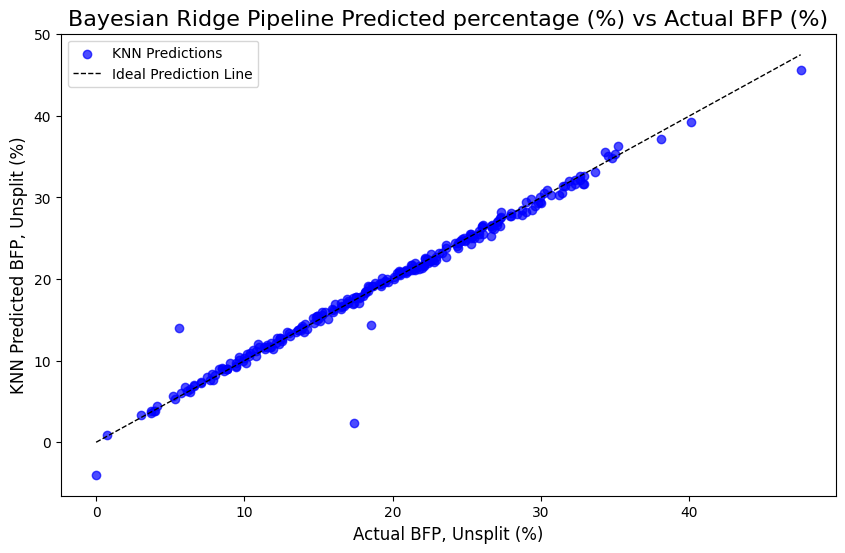

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(body_fat["target"], bayesian_ridge_pipeline_predictions, alpha=0.7, label="KNN Predictions", color="blue")
# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("Bayesian Ridge Pipeline Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Unsplit (%)", fontsize=12)
plt.ylabel("KNN Predicted BFP, Unsplit (%)", fontsize=12)
plt.show()
plt.close()

#### Model 1B: Bayesian Ridge Regression Model (split)

The second model that I will implement for problem 8 creates the pipeline for the Bayesian Ridge Regression Model, trained on the Body Fat dataset after splitting it into training and testing sets.

The following is the code to create the pipeline to standardize and perform PCA analysis using the Bayesian Ridge Regression model, fit the pipeline on the unsplit Body Fat dataset, and predict body fat percentage using said pipeline, as well as calculate the L2 and L1 losses for each pipeline model.

In [ ]:
refit_bayesian_ridge_pipeline = make_pipeline(StandardScaler(), PCA(), sklearn.linear_model.BayesianRidge())
print(refit_bayesian_ridge_pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('bayesianridge', BayesianRidge())])


In [ ]:
refit_bayesian_ridge_pipeline.fit(train_features, train_target)
refit_bayesian_ridge_pipeline_predictions = refit_bayesian_ridge_pipeline.predict(test_features)
refit_bayesian_ridge_pipeline_mse = np.mean((test_target - refit_bayesian_ridge_pipeline_predictions)**2)
refit_bayesian_ridge_pipeline_mae = np.mean(np.abs(test_target - refit_bayesian_ridge_pipeline_predictions))

Next is the 5-fold cross-validation results for this model:

In [ ]:
refit_bayesian_ridge_cv_pipeline = cross_validate(refit_bayesian_ridge_pipeline, test_features, test_target, scoring=scoring, cv=5, return_train_score=True)

refit_bayesian_ridge_cv_pipeline_r2_all = refit_bayesian_ridge_cv_pipeline["test_r2"]
refit_bayesian_ridge_cv_pipeline_mse_all = -refit_bayesian_ridge_cv_pipeline["test_neg_mean_squared_error"]

refit_bayesian_ridge_cv_pipeline_r2 = refit_bayesian_ridge_cv_pipeline_r2_all.mean()
refit_bayesian_ridge_cv_pipeline_mse = refit_bayesian_ridge_cv_pipeline_mse_all.mean()

print(f"The R-squared values for each fold are the following: {refit_bayesian_ridge_cv_pipeline_r2_all}")
print(f"The L2 losses for each fold are the following: {refit_bayesian_ridge_cv_pipeline_mse_all}")

The R-squared values for each fold are the following: [0.96296437 0.98764011 0.99577371 0.99774751 0.99326322]
The L2 losses for each fold are the following: [1.73502449 0.37949305 0.38494963 0.2238532  0.41734079]


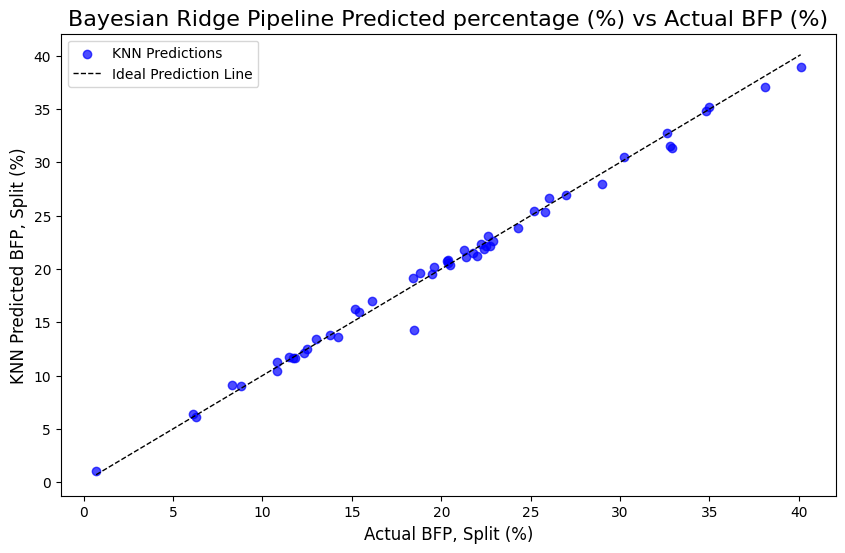

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_target, refit_bayesian_ridge_pipeline_predictions, alpha=0.7, label="KNN Predictions", color="blue")
# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("Bayesian Ridge Pipeline Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Split (%)", fontsize=12)
plt.ylabel("KNN Predicted BFP, Split (%)", fontsize=12)
plt.show()
plt.close()

#### Model 2A: Support Vector Regression Model (unsplit)

The first model that I will implement for problem 8 creates the pipeline for the Support Vector Regression Model, trained on the Body Fat dataset without splitting it into training and testing sets.

The following is the code to create the pipeline to standardize and perform PCA analysis using the Support Vector Regression model, fit the pipeline on the unsplit Body Fat dataset, and predict body fat percentage using said pipeline, as well as calculate the L2 and L1 losses for each pipeline model.

In [ ]:
# Create the SVR pipeline
svr_pipeline = make_pipeline(StandardScaler(), PCA(), svm.SVR(kernel="linear"))
print(svr_pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('svr', SVR(kernel='linear'))])


In [ ]:
# Fit, then calculate the MSE for the SVR Pipeline
svr_pipeline.fit(body_fat_features, body_fat["target"])
svr_pipeline_predictions = svr_pipeline.predict(body_fat_features)
svr_pipeline_mse = np.mean((body_fat["target"] - svr_pipeline_predictions)**2)
svr_pipeline_mae = np.mean(np.abs(body_fat["target"] - svr_pipeline_predictions))

Next is the 5-fold cross-validation results for this model:

In [ ]:
svr_cv_pipeline_model = svm.SVR(kernel="linear")
svr_cv_pipeline = cross_validate(svr_pipeline, body_fat_features, body_fat["target"], scoring=scoring, cv=5, return_train_score=True)

svr_cv_pipeline_r2_all = svr_cv_pipeline["test_r2"]
svr_cv_pipeline_mse_all = -svr_cv_pipeline["test_neg_mean_squared_error"]

svr_cv_pipeline_r2 = svr_cv_pipeline_r2_all.mean()
svr_cv_pipeline_mse = svr_cv_pipeline_mse_all.mean()

print(f"The R-squared values for each fold are the following: {svr_cv_pipeline_r2_all}")
print(f"The L2 losses for each fold are the following: {svr_cv_pipeline_mse_all}")

The R-squared values for each fold are the following: [0.98410521 0.90037222 0.99947468 0.99219338 0.99913444]
The L2 losses for each fold are the following: [1.49731136 6.36661977 0.01540685 0.49136621 0.07757184]


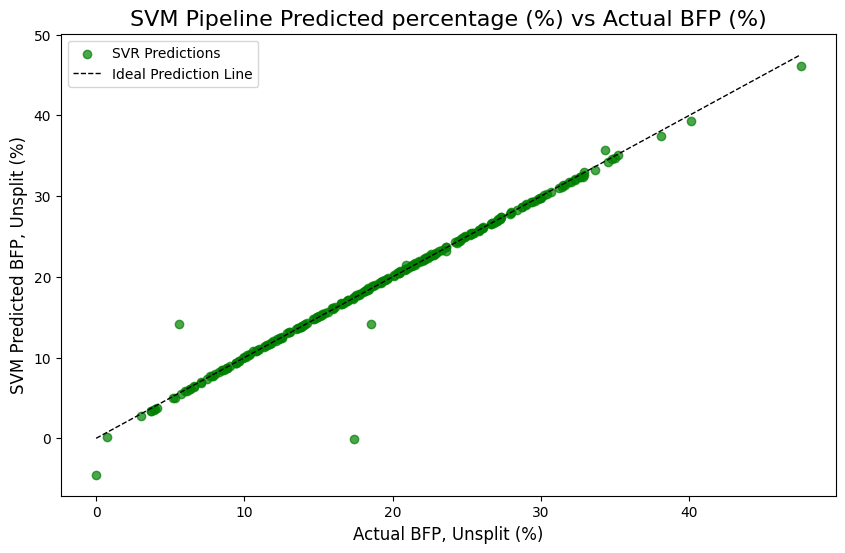

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(body_fat["target"], svr_pipeline_predictions, alpha=0.7, label="SVR Predictions", color="green")
# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("SVM Pipeline Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Unsplit (%)", fontsize=12)
plt.ylabel("SVM Predicted BFP, Unsplit (%)", fontsize=12)
plt.show()
plt.close()

#### Model 2B: Support Vector Regression Model (split)

The second model that I will implement for problem 8 creates the pipeline for the Support Vector Regression Model, trained on the Body Fat dataset after splitting it into training and testing sets.

The following is the code to create the pipeline to standardize and perform PCA analysis using the Support Vector Regression model, fit the pipeline on the split Body Fat dataset, and predict body fat percentage using said pipeline, as well as calculate the L2 and L1 losses for each pipeline model.

In [ ]:
refit_svr_pipeline = make_pipeline(StandardScaler(), PCA(), svm.SVR(kernel="linear"))
print(refit_svr_pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('svr', SVR(kernel='linear'))])


In [ ]:
refit_svr_pipeline.fit(train_features, train_target)
refit_svr_pipeline_predictions = refit_svr_pipeline.predict(test_features)
refit_svr_pipeline_mse = np.mean((test_target - refit_svr_pipeline_predictions)**2)
refit_svr_pipeline_mae = np.mean(np.abs(test_target - refit_svr_pipeline_predictions))

Next is the 5-fold cross-validation results for this model:

In [ ]:
refit_svr_cv_pipeline_model = svm.SVR(kernel="linear")
refit_svr_cv_pipeline = cross_validate(refit_svr_pipeline, test_features, test_target, scoring=scoring, cv=5, return_train_score=True)

refit_svr_cv_pipeline_r2_all = refit_svr_cv_pipeline["test_r2"]
refit_svr_cv_pipeline_mse_all = -refit_svr_cv_pipeline["test_neg_mean_squared_error"]

refit_svr_cv_pipeline_r2 = refit_svr_cv_pipeline_r2_all.mean()
refit_svr_cv_pipeline_mse = refit_svr_cv_pipeline_mse_all.mean()

print(f"The R-squared values for each fold are the following: {refit_svr_cv_pipeline_r2_all}")
print(f"The L2 losses for each fold are the following: {refit_svr_cv_pipeline_mse_all}")

The R-squared values for each fold are the following: [0.96060716 0.99678434 0.99798623 0.99934    0.99828661]
The L2 losses for each fold are the following: [1.84545348 0.09873245 0.18342288 0.06559112 0.10614411]


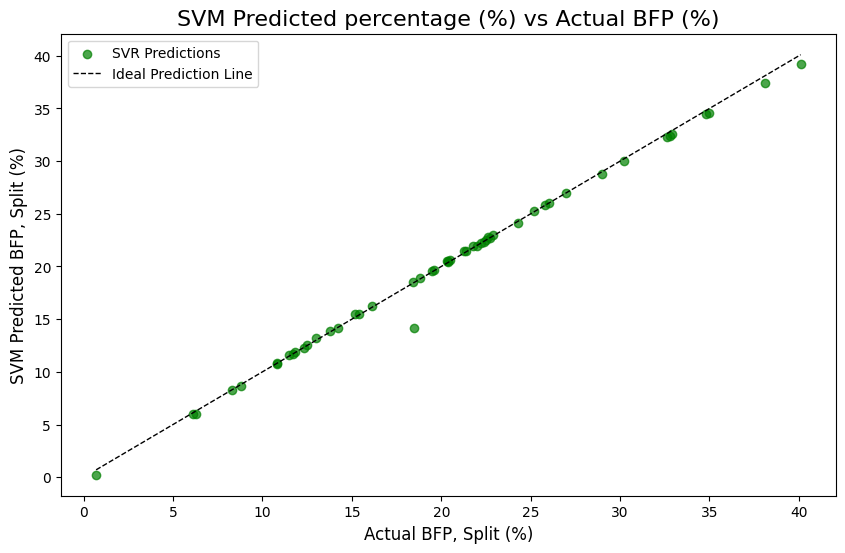

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_target, refit_svr_pipeline_predictions, alpha=0.7, label="SVR Predictions", color="green")
# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("SVM Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Split (%)", fontsize=12)
plt.ylabel("SVM Predicted BFP, Split (%)", fontsize=12)
plt.show()
plt.close()

#### Model 3A: K-Nearest Neighbors Regression Model (unsplit)

The first model that I will implement for problem 8 creates the pipeline for the K-Nearest Neighbors Regression Model, trained on the Body Fat dataset without splitting it into training and testing sets.

The following is the code to create the pipeline to standardize and perform PCA analysis using the K-Nearest Neighbors Regression model, fit the pipeline on the unsplit Body Fat dataset, and predict body fat percentage using said pipeline, as well as calculate the L2 and L1 losses for each pipeline model.

In [ ]:
# Create the KNN pipeline
knn_pipeline = make_pipeline(StandardScaler(), PCA(), KNeighborsRegressor(n_neighbors=5))
print(knn_pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('kneighborsregressor', KNeighborsRegressor())])


In [ ]:
# Fit, then calculate the MSE for the KNN Pipeline
knn_pipeline.fit(body_fat_features, body_fat["target"])
knn_pipeline_predictions = knn_pipeline.predict(body_fat_features)
knn_pipeline_mse = np.mean((body_fat["target"] - knn_pipeline_predictions)**2)
knn_pipeline_mae = np.mean(np.abs(body_fat["target"] - knn_pipeline_predictions))

Next is the 5-fold cross-validation results for this model:

In [ ]:
knn_cv_pipeline_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_cv_pipeline = cross_validate(knn_pipeline, body_fat_features, body_fat["target"], scoring=scoring, cv=5, return_train_score=True)

knn_cv_pipeline_r2_all = knn_cv_pipeline["test_r2"]
knn_cv_pipeline_mse_all = -knn_cv_pipeline["test_neg_mean_squared_error"]

knn_cv_pipeline_r2 = knn_cv_pipeline_r2_all.mean()
knn_cv_pipeline_mse = knn_cv_pipeline_mse_all.mean()

print(f"The R-squared values for each fold are the following: {knn_cv_pipeline_r2_all}")
print(f"The L2 losses for each fold are the following: {knn_cv_pipeline_mse_all}")

The R-squared values for each fold are the following: [0.81837414 0.74646971 0.6880251  0.79652366 0.83647956]
The L2 losses for each fold are the following: [17.10940427 16.20161475  9.14977602 12.80726348 14.65478358]


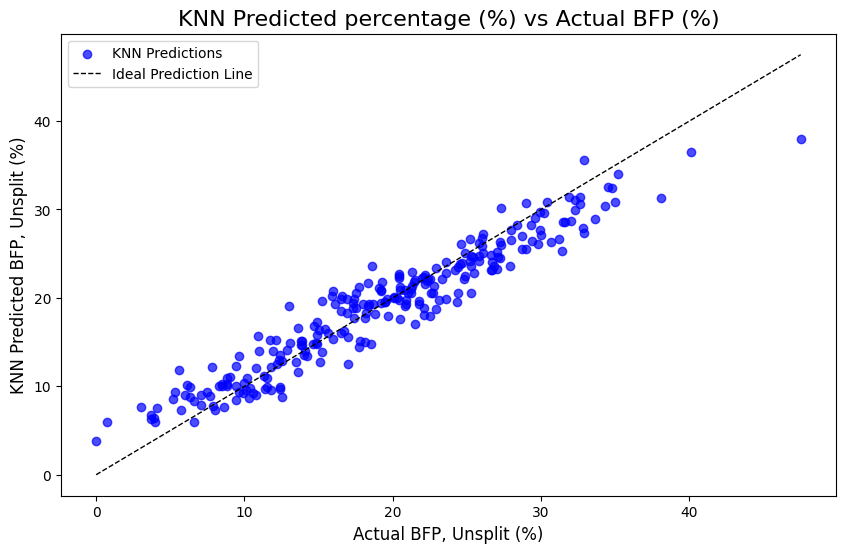

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(body_fat["target"], knn_pipeline_predictions, alpha=0.7, label="KNN Predictions", color="blue")
# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("KNN Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Unsplit (%)", fontsize=12)
plt.ylabel("KNN Predicted BFP, Unsplit (%)", fontsize=12)
plt.show()
plt.close()

#### Model 3B: K-Nearest Neighbors Regression Model (split)

The first model that I will implement for problem 8 creates the pipeline for the K-Nearest Neighbors Regression Model, trained on the Body Fat dataset after splitting it into training and testing sets.

The following is the code to create the pipeline to standardize and perform PCA analysis using the K-Nearest Neighbors Regression model, fit the pipeline on the split Body Fat dataset, and predict body fat percentage using said pipeline, as well as calculate the L2 and L1 losses for each pipeline model.

In [ ]:
refit_knn_pipeline = make_pipeline(StandardScaler(), PCA(), KNeighborsRegressor(n_neighbors=5))
print(refit_knn_pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('kneighborsregressor', KNeighborsRegressor())])


In [ ]:
refit_knn_pipeline.fit(train_features, train_target)
refit_knn_pipeline_predictions = refit_knn_pipeline.predict(test_features)
refit_knn_pipeline_mse = np.mean((test_target - refit_knn_pipeline_predictions)**2)
refit_knn_pipeline_mae = np.mean(np.abs(test_target - refit_knn_pipeline_predictions))

Next is the 5-fold cross-validation results for this model:

In [ ]:
refit_knn_cv_pipeline_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
refit_knn_cv_pipeline = cross_validate(refit_knn_pipeline, test_features, test_target, scoring=scoring, cv=5, return_train_score=True)

refit_knn_cv_pipeline_r2_all = refit_knn_cv_pipeline["test_r2"]
refit_knn_cv_pipeline_mse_all = -refit_knn_cv_pipeline["test_neg_mean_squared_error"]

refit_knn_cv_pipeline_r2 = refit_knn_cv_pipeline_r2_all.mean()
refit_knn_cv_pipeline_mse = refit_knn_cv_pipeline_mse_all.mean()

print(f"The R-squared values for each fold are the following: {refit_knn_cv_pipeline_r2_all}")
print(f"The L2 losses for each fold are the following: {refit_knn_cv_pipeline_mse_all}")

The R-squared values for each fold are the following: [0.63129688 0.54565458 0.65909724 0.32340021 0.73107819]
The L2 losses for each fold are the following: [17.27279512 13.95003992 31.05095439 67.24076114 16.65959768]


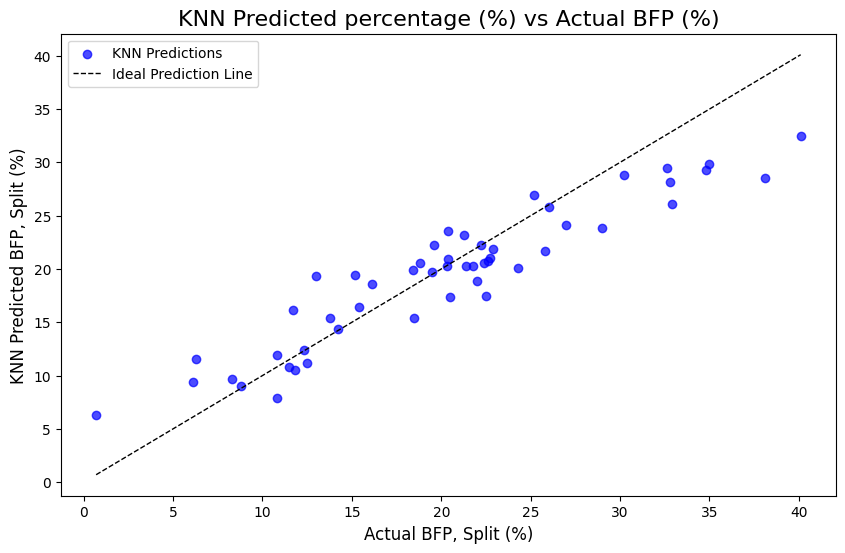

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_target, refit_knn_pipeline_predictions, alpha=0.7, label="KNN Predictions", color="blue")
# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.legend()
plt.title("KNN Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Split (%)", fontsize=12)
plt.ylabel("KNN Predicted BFP, Split (%)", fontsize=12)
plt.show()
plt.close()

#### Summary for models fit on the unsplit dataset

The following are summaries of the L2 losses for the Bayesian Ridge Regression, Support Vector Regression, and the K-Nearest Neighbors Regression models fit on the unsplit dataset and subject to the scikit-learn pipeline to preprocess and standardize the data:

In [ ]:
print(f"- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of {bayesian_ridge_pipeline_mse}.")
print(f"- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of {svr_pipeline_mse}.")
print(f"- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of {knn_pipeline_mse}.")

- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of 1.5276783621338856.
- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of 1.6982849798081388.
- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of 6.310403120648124.


A plot containing plots for all pipeline-subject models fit on the unsplit dataset can be found below.

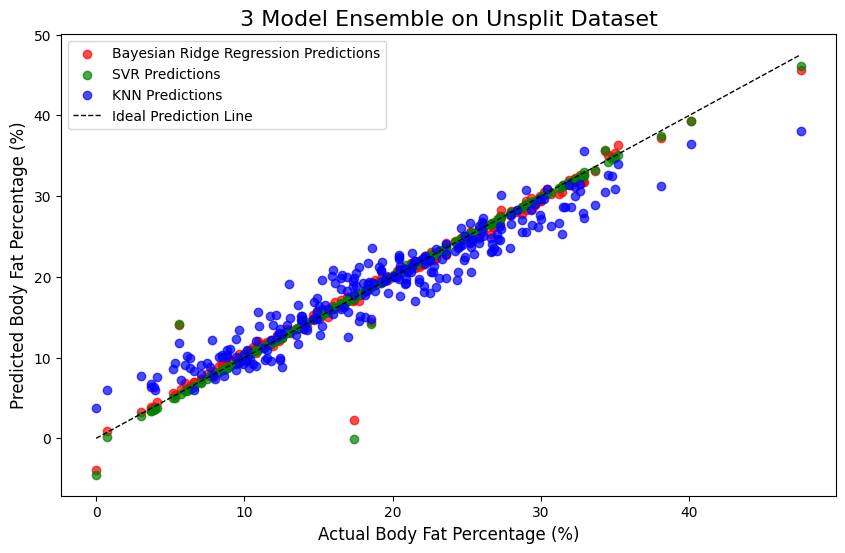

In [ ]:
plt.figure(figsize=(10, 6))

# Bayesian Regression Predictions
plt.scatter(body_fat["target"], bayesian_ridge_pipeline_predictions, alpha=0.7, label="Bayesian Ridge Regression Predictions", color="red")

# Support Vector Regression Predictions
plt.scatter(body_fat["target"], svr_pipeline_predictions, alpha=0.7, label="SVR Predictions", color="green")

# K-Nearest Neighbors Predictions
plt.scatter(body_fat["target"], knn_pipeline_predictions, alpha=0.7, label="KNN Predictions", color="blue")

# Ideal Prediction Line
plt.plot([body_fat["target"].min(), body_fat["target"].max()],
         [body_fat["target"].min(), body_fat["target"].max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.title("3 Model Ensemble on Unsplit Dataset", fontsize=16)
plt.xlabel("Actual Body Fat Percentage (%)", fontsize=12)
plt.ylabel("Predicted Body Fat Percentage (%)", fontsize=12)
plt.legend()

plt.show()
plt.close()

Compare this with the L2 losses of the model set without being subject to scikit-learn pipelines to preprocess and standardize each model:

In [ ]:
print(f"- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of {bayesian_ridge_mse}.")
print(f"- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of {svr_mse}.")
print(f"- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of {knn_mse}.")

- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of 17.85249298352007.
- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of 18.056185016303242.
- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of 18.919979217185883.


With the large reduction in L2 losses it is evident that, when subject to respective pipelines to preprocess and standardized each model, each model set performs significantly better than they did without being subject to this pipeline.

Additionally, these differences are found across the board with the differences of L2 losses for all three models.

Overall, it appears that the Bayesian Ridge Regression pipeline model performs the best under these constraints as it yields the lowest L2 loss.

#### Summary for models fit on the split dataset

The following are summaries of the L2 and the L1 losses for the Bayesian Ridge Regression, Support Vector Regression, and the K-Nearest Neighbors Regression models fit on the split dataset and subject to the scikit-learn pipeline to preprocess and standardize the data:

In [ ]:
print(f"- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of {refit_bayesian_ridge_pipeline_mse}.")
print(f"- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of {refit_svr_pipeline_mse}.")
print(f"- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of {refit_knn_pipeline_mse}.")

- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of 0.6791543835032303.
- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of 0.41758574189843145.
- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of 12.289559971387089.


A plot containing plots for all models fit on the split dataset can be found below.

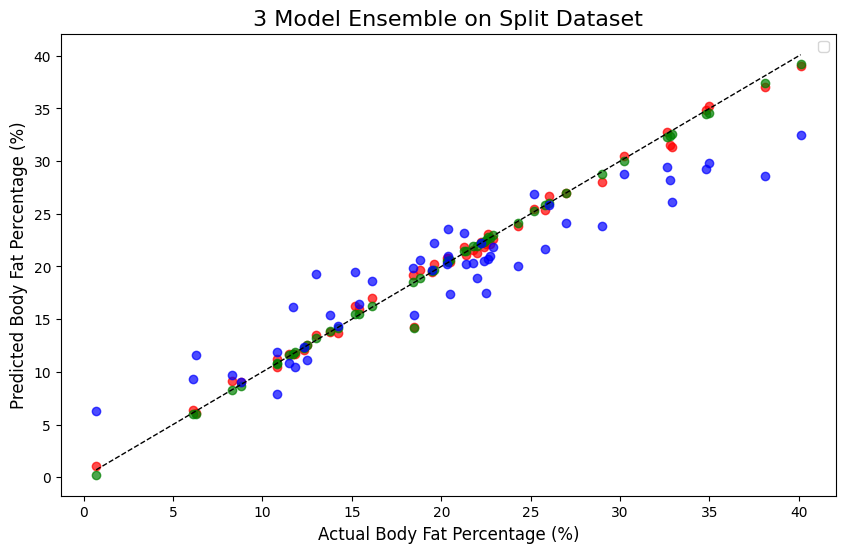

In [ ]:
plt.figure(figsize=(10, 6))

# Bayesian Regression Predictions
plt.scatter(test_target, refit_bayesian_ridge_pipeline_predictions, alpha=0.7, label="Bayesian Ridge Regression Predictions", color="red")

# Support Vector Regression Predictions
plt.scatter(test_target, refit_svr_pipeline_predictions, alpha=0.7, label="SVR Predictions", color="green")

# K-Nearest Neighbors Predictions
plt.scatter(test_target, refit_knn_pipeline_predictions, alpha=0.7, label="KNN Predictions", color="blue")

# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.title("3 Model Ensemble on Split Dataset", fontsize=16)
plt.xlabel("Actual Body Fat Percentage (%)", fontsize=12)
plt.ylabel("Predicted Body Fat Percentage (%)", fontsize=12)
plt.legend("")

plt.show()
plt.close()

Compare this with the L2 losses of the model set without being subject to scikit-learn pipelines to preprocess and standardize each model:

In [ ]:
print(f"- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of {refit_bayesian_ridge_mse}.")
print(f"- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of {refit_svr_mse}.")
print(f"- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of {refit_knn_mse}.")

- the Bayesian Ridge Pipeline model has an L2 loss (mean squared error) of 18.76728204648941.
- the Support Vector Regression Pipeline model has an L2 loss (mean squared error) of 18.69119946313471.
- the K-Nearest Neighbors Pipeline model has an L2 loss (mean squared error) of 28.567646174982894.


With the large reduction in L2 losses, it is evident that, when subject to respective pipelines to preprocess and standardized each model, each model set performs significantly better than they did without being subject to this pipeline.

Additionally, these differences are found across the board with the differences of L2 losses for all three models, though this is a bit less evident for the differences of L2 losses for the K-Nearest Neighbors Pipeline model with respect to the Bayesian Ridge Regression and Support Vector Regression pipeline models.

Overall, it appears that the Support Vector Regression pipeline model performs the best under these constraints as it yields the lowest L2 loss.

### Step 9: Why more complex decision trees aren't actually better

Would generating 1000 decision tree models assigned with random depth limits likely find an improvement given that cross validation is utilized?

For this step, I demonstrate why simpler decision trees may be better.

<h4>Maximizing R-squared score while minimizing tree depth</h4>
<p>To answer this question, I wanted to experiment with finding the R-squared scores for 10 different decision tree regressor models with max depth limits of 1 to 10.</p>
<p>The relevant code is as follows:</p>

In [ ]:
# YOUR CODE HERE
import sklearn.tree

decision_tree_model_1 = sklearn.tree.DecisionTreeRegressor(max_depth=1)
decision_tree_1 = cross_validate(decision_tree_model_1, train_features, train_target)
decision_tree_model_1.fit(train_features, train_target)
decision_tree_model_1_score = decision_tree_model_1.score(test_features, test_target)
decision_tree_model_1_depth = decision_tree_model_1.get_depth()

decision_tree_model_2 = sklearn.tree.DecisionTreeRegressor(max_depth=2)
decision_tree_2 = cross_validate(decision_tree_model_2, train_features, train_target)
decision_tree_model_2.fit(train_features, train_target)
decision_tree_model_2_score = decision_tree_model_2.score(test_features, test_target)
decision_tree_model_2_depth = decision_tree_model_2.get_depth()

decision_tree_model_3 = sklearn.tree.DecisionTreeRegressor(max_depth=3)
decision_tree_3 = cross_validate(decision_tree_model_3, train_features, train_target)
decision_tree_model_3.fit(train_features, train_target)
decision_tree_model_3_score = decision_tree_model_3.score(test_features, test_target)
decision_tree_model_3_depth = decision_tree_model_3.get_depth()

decision_tree_model_4 = sklearn.tree.DecisionTreeRegressor(max_depth=4)
decision_tree_4 = cross_validate(decision_tree_model_4, train_features, train_target)
decision_tree_model_4.fit(train_features, train_target)
decision_tree_model_4_score = decision_tree_model_4.score(test_features, test_target)
decision_tree_model_4_depth = decision_tree_model_4.get_depth()

decision_tree_model_5 = sklearn.tree.DecisionTreeRegressor(max_depth=5)
decision_tree_5 = cross_validate(decision_tree_model_5, train_features, train_target)
decision_tree_model_5.fit(train_features, train_target)
decision_tree_model_5_score = decision_tree_model_5.score(test_features, test_target)
decision_tree_model_5_depth = decision_tree_model_5.get_depth()

decision_tree_model_6 = sklearn.tree.DecisionTreeRegressor(max_depth=6)
decision_tree_6 = cross_validate(decision_tree_model_6, train_features, train_target)
decision_tree_model_6.fit(train_features, train_target)
decision_tree_model_6_score = decision_tree_model_6.score(test_features, test_target)
decision_tree_model_6_depth = decision_tree_model_6.get_depth()

decision_tree_model_7 = sklearn.tree.DecisionTreeRegressor(max_depth=7)
decision_tree_7 = cross_validate(decision_tree_model_7, train_features, train_target)
decision_tree_model_7.fit(train_features, train_target)
decision_tree_model_7_score = decision_tree_model_7.score(test_features, test_target)
decision_tree_model_7_depth = decision_tree_model_7.get_depth()

decision_tree_model_8 = sklearn.tree.DecisionTreeRegressor(max_depth=8)
decision_tree_ = cross_validate(decision_tree_model_8, train_features, train_target)
decision_tree_model_8.fit(train_features, train_target)
decision_tree_model_8_score = decision_tree_model_8.score(test_features, test_target)
decision_tree_model_8_depth = decision_tree_model_8.get_depth()

decision_tree_model_9 = sklearn.tree.DecisionTreeRegressor(max_depth=9)
decision_tree_9 = cross_validate(decision_tree_model_9, train_features, train_target)
decision_tree_model_9.fit(train_features, train_target)
decision_tree_model_9_score = decision_tree_model_9.score(test_features, test_target)
decision_tree_model_9_depth = decision_tree_model_9.get_depth()

decision_tree_model_10 = sklearn.tree.DecisionTreeRegressor(max_depth=10)
decision_tree_10 = cross_validate(decision_tree_model_10, train_features, train_target)
decision_tree_model_10.fit(train_features, train_target)
decision_tree_model_10_score = decision_tree_model_10.score(test_features, test_target)
decision_tree_model_10_depth = decision_tree_model_10.get_depth()

Next, I created a Pandas dataframe containing the identifier for each model (identified by the their max depth limits), each model's score, and each model's depth.

In [ ]:
decision_tree_scores = pd.DataFrame({
    "Model": [
    'Model 1',
    'Model 2',
    'Model 3',
    'Model 4',
    'Model 5',
    'Model 6',
    'Model 7',
    'Model 8',
    'Model 9',
    'Model 10'
    ],
    "Score": [
    decision_tree_model_1_score,
    decision_tree_model_2_score,
    decision_tree_model_3_score,
    decision_tree_model_4_score,
    decision_tree_model_5_score,
    decision_tree_model_6_score,
    decision_tree_model_7_score,
    decision_tree_model_8_score,
    decision_tree_model_9_score,
    decision_tree_model_10_score
    ],
    "Depth": [
    decision_tree_model_1_depth,
    decision_tree_model_2_depth,
    decision_tree_model_3_depth,
    decision_tree_model_4_depth,
    decision_tree_model_5_depth,
    decision_tree_model_6_depth,
    decision_tree_model_7_depth,
    decision_tree_model_8_depth,
    decision_tree_model_9_depth,
    decision_tree_model_10_depth
    ]
})

Finally, here's the output of the score and depth for each respective decision tree regressor model:

In [ ]:
print(decision_tree_scores)

      Model     Score  Depth
0   Model 1  0.619943      1
1   Model 2  0.871701      2
2   Model 3  0.900774      3
3   Model 4  0.951005      4
4   Model 5  0.953823      5
5   Model 6  0.957155      6
6   Model 7  0.957944      7
7   Model 8  0.957081      8
8   Model 9  0.958785      9
9  Model 10  0.956802     10


Finally, the following is a set of plots for the score and depth for each model:

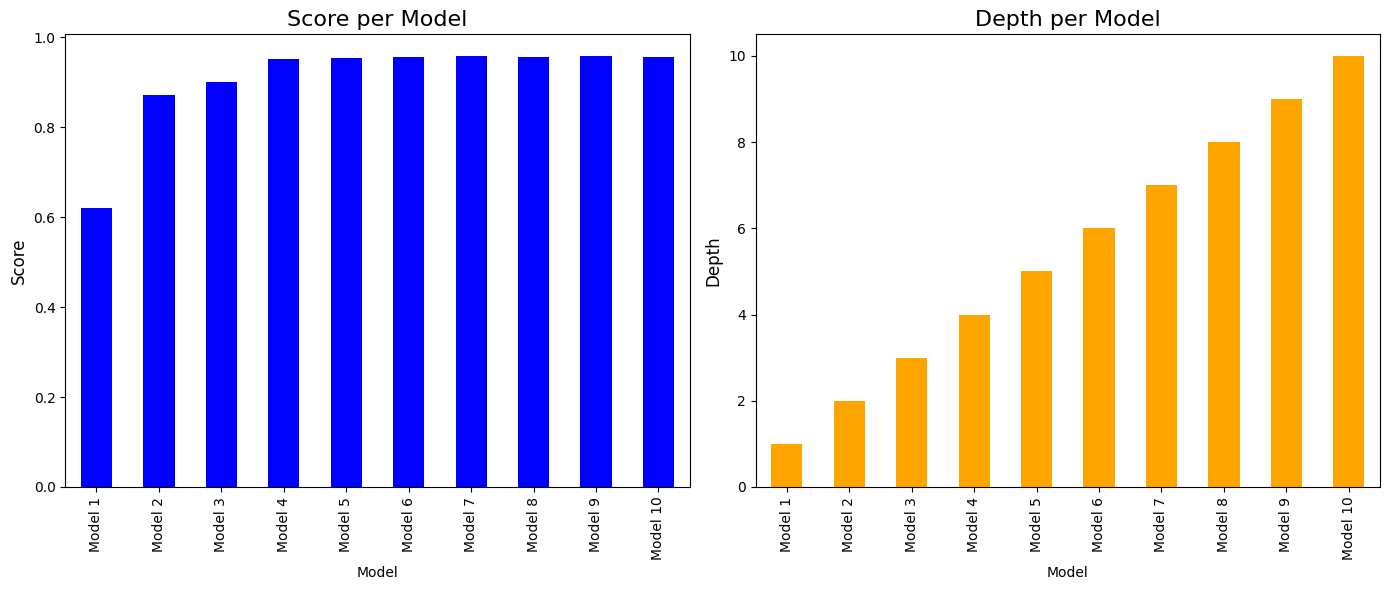

In [ ]:
# Create a figure with two subplots in 1 row
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot Score in the first subplot
decision_tree_scores.plot(kind="bar", x="Model", y="Score", ax=axes[0], legend=False, color='blue')
axes[0].set_title("Score per Model", fontsize=16)
axes[0].set_ylabel("Score", fontsize=12)

# Plot Depth in the second subplot
decision_tree_scores.plot(kind="bar", x="Model", y="Depth", ax=axes[1], legend=False, color='orange')
axes[1].set_title("Depth per Model", fontsize=16)
axes[1].set_ylabel("Depth", fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

It appears, from this experimentation, that there are no meaningful increases in score after a depth of 4, hence, this appears to be the threshold for maximizing the R-squared score and keeping the complexity (decision tree depth) as low as possible for interpretability.

#### Maximizing R-squared score while minimizing n_estimators_range

I also experimented with creating a set of Random Forest Classifier models wherein I begin by importing RandomForestClassifier from the sklearn.ensemble module.  Then, I split the target dataset by the median to assign "0" to each body fat percentage below the median and "1" to each body fat percentage above the median.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Calculate the median of the target column
median_target = train_target.median()

# Step 2: Create a binary classifier column
train_class = train_target > median_target  # 1 if greater, 0 if less or equal
test_class = test_target > median_target
# print(body_fat_class)

Next, I identify the set of five n_estimator_range values for which to test with the Random Forest Classifier and, at the same time, I create an empty array for the scores for each model for each respective n_estimator_range value.

In [ ]:
# Preallocate an array to store scores
# n_estimators_ranges = [20, 40, 60, 80, 100]
n_estimators_ranges = [1, 5, 10, 25, 50, 100]
total_estimator_scores = []

Then, the following code loops through the n_estimators ranges to create a new random forest classifier model given the n_estimators of 1 to n then cross validating it.  Using the cross validated model, the R-squared score is generated and, finally, this R-squared score is appended to the total_estimator_scores list.

In [ ]:
for n_estimators_range in n_estimators_ranges:
    random_forest_classifier_scores = np.zeros(n_estimators_range)
    for n in range(1, n_estimators_range + 1):
        random_forest_classifier = RandomForestClassifier(n_estimators = n, max_depth = 10, random_state=42)
        random_forest = cross_validate(random_forest_classifier, train_features, train_class, cv=5)
        random_forest_classifier_score = random_forest["test_score"].mean()
        random_forest_classifier_scores[n - 1] = random_forest_classifier_score
    total_estimator_scores.append(random_forest_classifier_scores)

With a complete total_estimator_scores list generated for each random forest classifier model ensemble (based on each n_estimator), a distribution of R-squared values can now be plotted for each random forest classifier model ensemble.

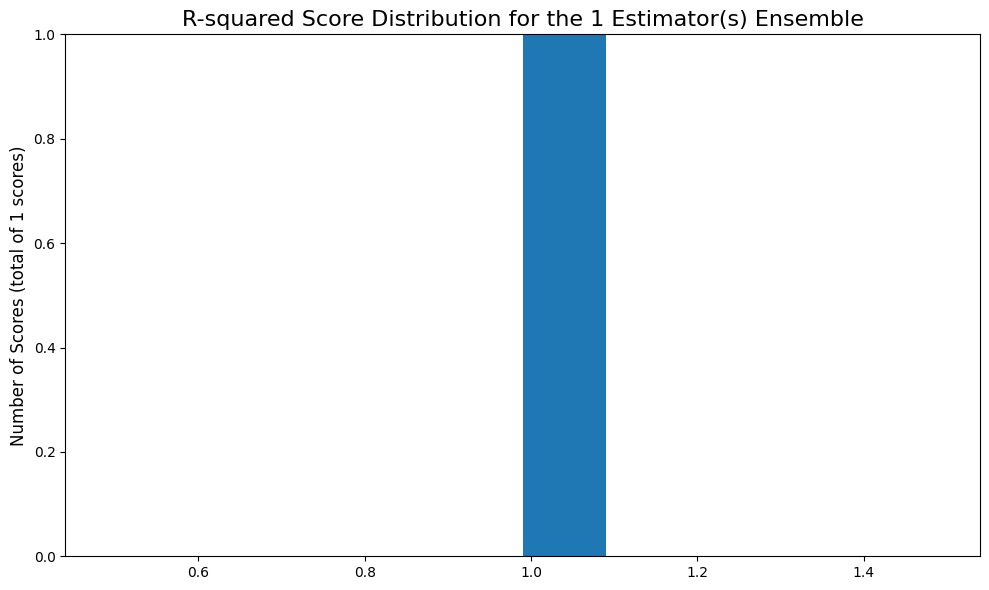

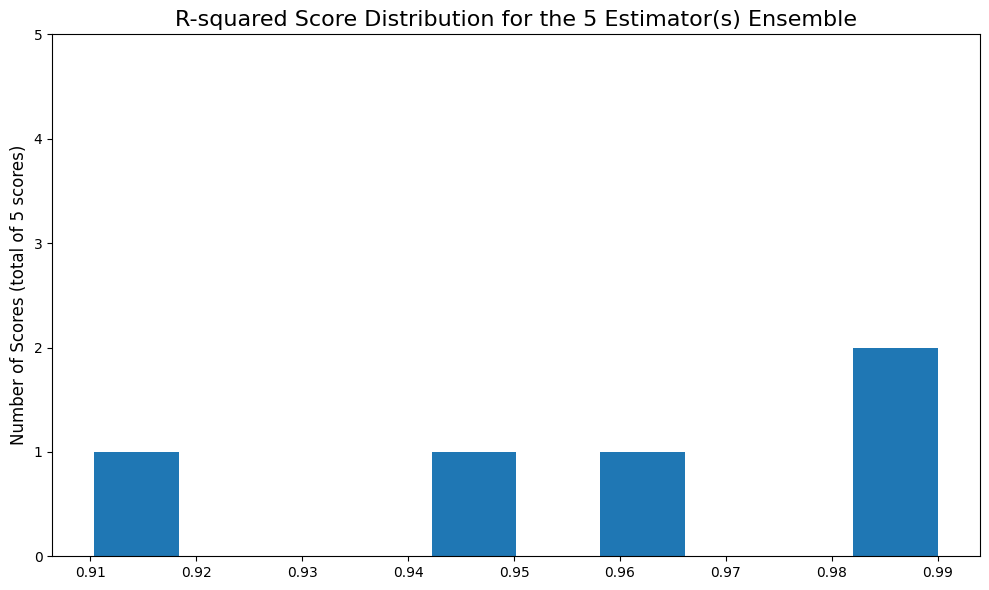

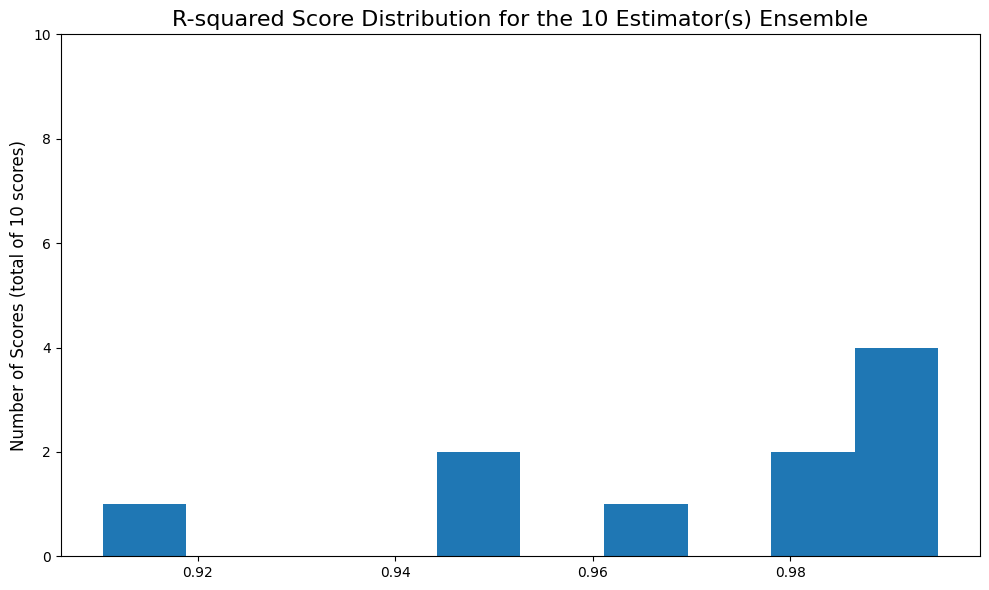

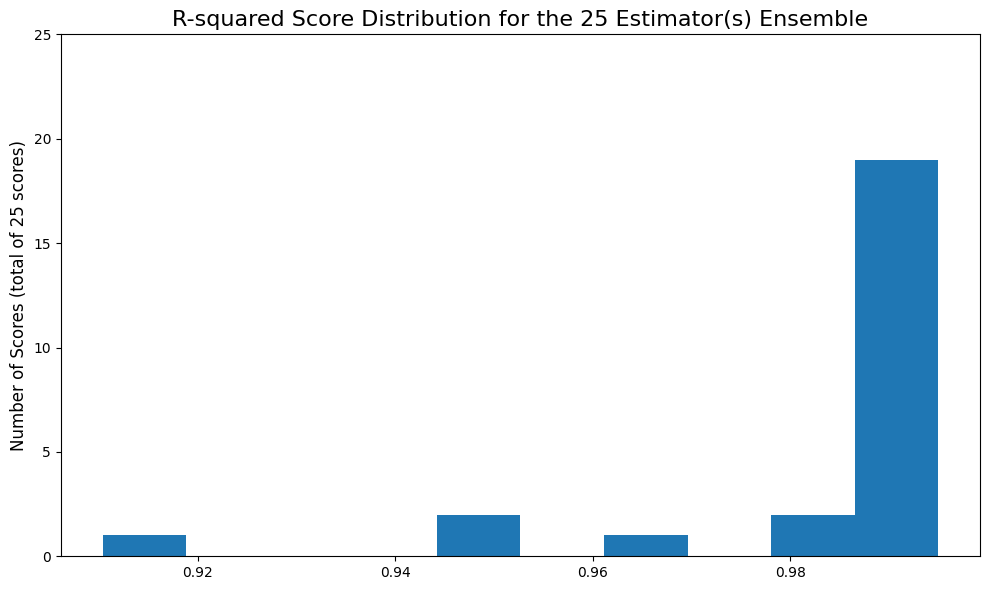

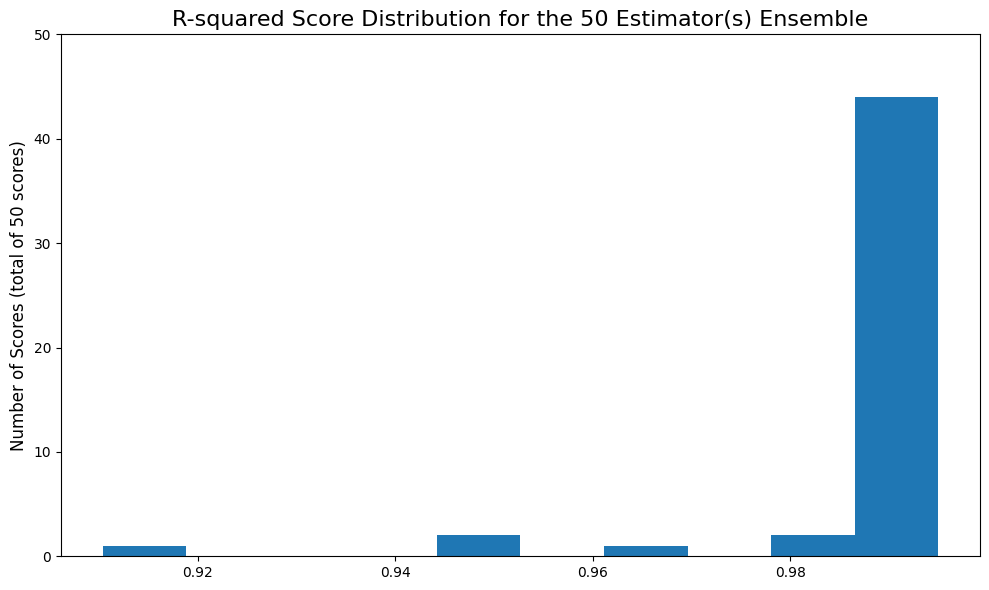

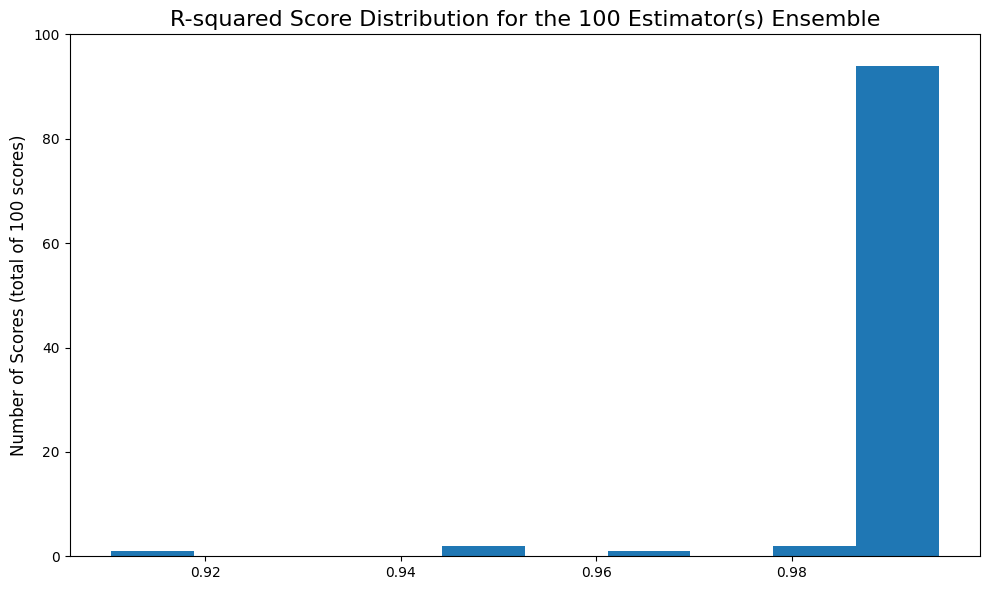

In [ ]:
for i, scores in enumerate(total_estimator_scores):
    plt.figure(figsize=(10, 6))

    # Plot Score in the first subplot
    plt.hist(scores)
    plt.title(f"R-squared Score Distribution for the {n_estimators_ranges[i]} Estimator(s) Ensemble", fontsize=16)
    plt.ylim(0, n_estimators_ranges[i])
    plt.ylabel(f"Number of Scores (total of {n_estimators_ranges[i]} scores)", fontsize=12)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

<h4>Answer</h4>
<p>Interpretability is preferred as complexity (in both depth and the number of decision trees) doesn't always translate into meaningfully higher scores for decision tree ensembles with cross validation due to diminishing returns with increases in complexity, so finding the decision tree ensemble threshold for the least complexity and the highest scores would be more worthwhile.</p>

### Step 10: Choosing the Best Model

Going back to the new regression models that were generated in Steps 5-8, for this step, I use my newfound data analytic thinking skills and informed intuition to determine the best, overall, model.

#### Criteria for the Best Model

Considering the analysis for this project, at this point, my choice for the best model would be contingent on how well a model fits the criteria of:
- Yielding the best R-squared score (the highest) and/or L2 loss score (the lowest).
- Only count when the model is the best after being trained and fit on training data and serving as the best predictive model for the body fat percentage based on "new" data, such as the testing features.
- Only count the relevant R-squared score and L2 loss using 5-fold cross-validation.

As a result, this only counts 2 different iterations of each model:
- The first being the basic implementation.
- The second being the pipeline implementation.  

However, I compare the results of Problem 7 (where the basic implementation was subject to 5-fold cross-validation) and the cross-validation results of the pipeline models for Problem 8.  

This is because cross-validation, even on a prefitted model, reinitializes and trains the model from scratch, and so performing cross-validation on existing models in Problem 6 would not be worthwhile as it would yield the same results as Problem 7.

<h4>The Best Model for Split Data</h4>

To streamline the process of outputting the respective R-squared scores and L2 loss for each model when trained on and fit to the split dataset, I created a model list and a list of model statements for each respective model where I compiled their respective R-squared score and L2 losses into their respective lists.

In [ ]:
model_list = [
    "Bayesian Ridge Regression",
    "Support Vector Regression",
    "K-Nearest Neighbors Regression",
    "Standardized Bayesian Ridge Regression Pipeline",
    "Standardized Support Vector Regression Pipeline",
    "Standardized K-Nearest Neighbors Regression Pipeline"
]

model_statement = [
    "The first model was the Bayesian Ridge Regression model.",
    "The second model was the Support Vector Regression model.",
    "The third model was the K-Nearest Neighbors Regression model.",
    "The fourth model was the Bayesian Ridge Regression Pipeline model\n (standardized by mean = 0, standard deviation = 1).",
    "The fifth model was the Support Vector Regression Pipeline model\n (standardized by mean = 0, standard deviation = 1).",
    "The sixth model was the K-Nearest Neighbors Regression Pipeline model\n (standardized by mean = 0, standard deviation = 1)."
]

refit_r2_scores = np.array([
    refit_bayesian_ridge_cv_r2,
    refit_svr_cv_r2,
    refit_knn_cv_r2,
    refit_bayesian_ridge_cv_pipeline_r2,
    refit_svr_cv_pipeline_r2,
    refit_knn_cv_pipeline_r2
])

refit_mse_scores = np.array([
    refit_bayesian_ridge_mse,
    refit_svr_mse,
    refit_knn_mse,
    refit_bayesian_ridge_pipeline_mse,
    refit_svr_pipeline_mse,
    refit_knn_pipeline_mse
])

After that, I created variables for the maximum R-squared and minimum L2 loss scores (and the associated model for each) to find the measure of the "best" model for the split dataset according to both metrics.

In [ ]:
refit_max_r2_model = model_list[refit_r2_scores.argmax()]
refit_max_r2_score = refit_r2_scores[refit_r2_scores.argmax()]
refit_min_mse_model = model_list[refit_mse_scores.argmin()]
refit_min_mse_score = refit_mse_scores[refit_mse_scores.argmin()]

Finally, I output print statements to demonstrate the results, accordingly.

In [ ]:
print("Among the models trained and fit on the split dataset:")
print()

for i, score in enumerate(refit_r2_scores):
    print(model_statement[i])
    print(f"The calculated R-squared score for this model was {score}.")
    print(f"The calculated L2 loss (mean squared error) for this model was {refit_mse_scores[i]}.")
    print()

print(f"Among all models trained and fit on the split dataset, the {refit_max_r2_model} model has the highest R-squared value,\nwith an R-squared value of {refit_max_r2_score}.")
print()
print(f"Among all models trained and fit on the split dataset, the {refit_min_mse_model} model has the lowest L2 loss,\nwith a mean squared error value of {refit_min_mse_score}.")

Among the models trained and fit on the split dataset:

The first model was the Bayesian Ridge Regression model.
The calculated R-squared score for this model was 0.6453917835411055.
The calculated L2 loss (mean squared error) for this model was 18.76728204648941.

The second model was the Support Vector Regression model.
The calculated R-squared score for this model was 0.5528846550128492.
The calculated L2 loss (mean squared error) for this model was 18.69119946313471.

The third model was the K-Nearest Neighbors Regression model.
The calculated R-squared score for this model was 0.33897491321551554.
The calculated L2 loss (mean squared error) for this model was 28.567646174982894.

The fourth model was the Bayesian Ridge Regression Pipeline model
 (standardized by mean = 0, standard deviation = 1).
The calculated R-squared score for this model was 0.9874777835481547.
The calculated L2 loss (mean squared error) for this model was 0.6791543835032303.

The fifth model was the Support V

<p>It is evident that the Standardized Support Vector Regression Pipeline model has both the lowest L2 loss and the highest R-squared value, indicating that it is the model that can best utilize the features of the Body Fat dataset to predict body fat percentage using the split dataset.</p>
<p>The plot for these predicted values against the actual body fat percentage values is situated below:</p>

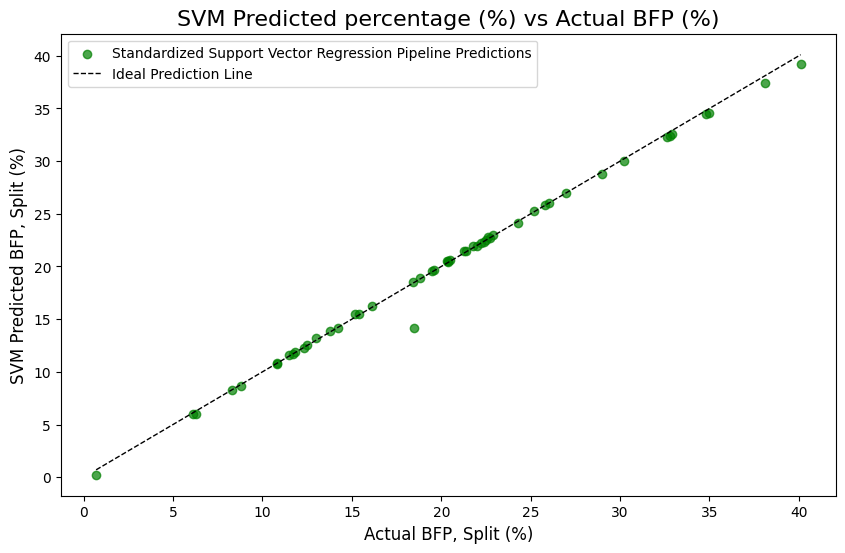

In [ ]:
# Plot the Standardized Support Vector Regression Pipeline model
plt.figure(figsize=(10, 6))

# Standardized Suport Vector Regression Pipeline Predictions
plt.scatter(test_target, refit_svr_pipeline_predictions, alpha=0.7, label="Standardized Support Vector Regression Pipeline Predictions", color="green")

# Ideal Prediction Line
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'k--', lw=1, label="Ideal Prediction Line")
plt.title("SVM Predicted percentage (%) vs Actual BFP (%)", fontsize=16)
plt.xlabel("Actual BFP, Split (%)", fontsize=12)
plt.ylabel("SVM Predicted BFP, Split (%)", fontsize=12)
plt.legend()

plt.show()
plt.close()

This plot shows how closely the predicted values of the Standardized Support Vector Regression Pipeline model correlate with the actual body fat percentage values.

<h4>Conclusion</h4>
<p>Based on this analysis of refitted models, and the previous analysis of models fitted on the entire dataset, it is evident that the Standardized Support Vector Regression Pipeline model yields the best R-squared scores and the lowest L2 losses among the datasets analyzed by training, fitting and testing on separate split datasets and using cross-validation.</p>
<p>However, it should be noted that, when accounting for the training and testing data sets, the second best performing model is the Standardized Bayesian Ridge Pipeline Regression model.  In the same light, the second best performing model when training on the entire dataset (without splitting it into training and testing sets) is the Standardized Support Vector Regression Pipeline model.  The differences in the respective L2 losses and R-squared scores for both models is neglible and it is arguable to conclude that both models are equally as effective.  But, for the purposes of answering this problem, I chose to prioritize the L2 losses and R-squared scores generated by each model when trained and tested on respective training and testing data sets as doing so better reflects the reality that these models would be implemented on new data in a real-world setting.</p>
<p>Finally, though it yields a far higher L2 loss and a slightly lower R-squared score than either the Standardized Support Vector Regression Pipeline model and the Standardized Bayesian Ridge Regression model, the Standardized K-Nearest Neighbors Regression model is still the third best performing model when accounting for the L2 loss and the R-squared score for the model when accounting for training on the entire dataset (without splitting it into training and testing sets) and when splitting it into training and testing sets.  Thus, it can also be concluded that the scikit-learn pipeline techniques increase the overall accuracy of each model in the analysis done for this project.</p>